<a href="https://colab.research.google.com/github/Anshulchimnani/CrudOP/blob/main/Gammadatasetpractise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('/content/magic04.data', names=cols)
data.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
data["class"] = data["class"].map({"g": 0, "h": 1})

len(data)

19020

##Classification Models


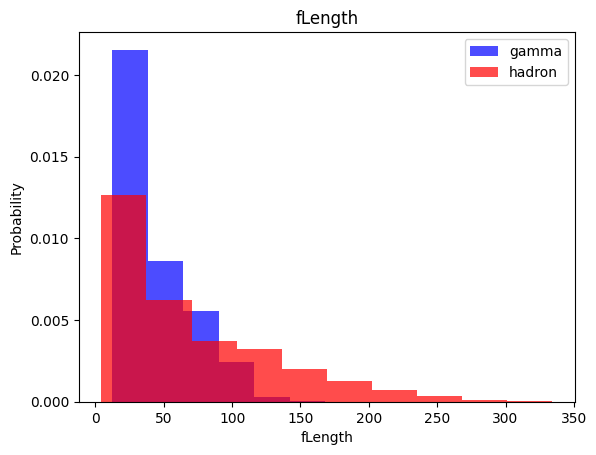

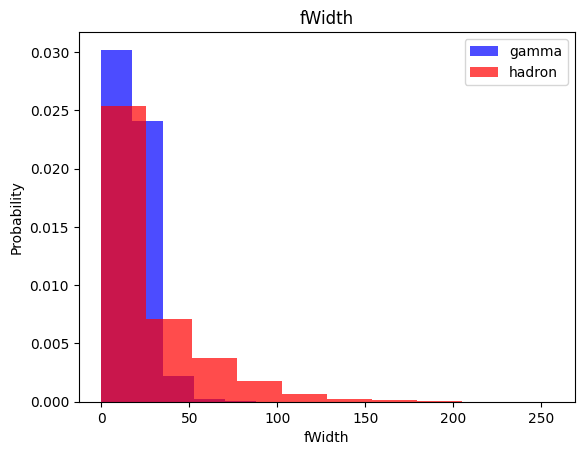

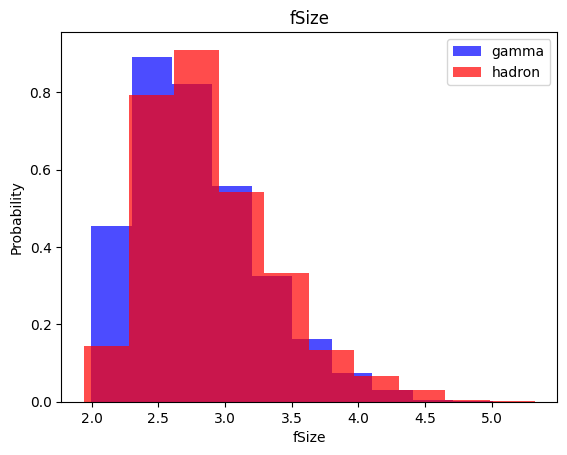

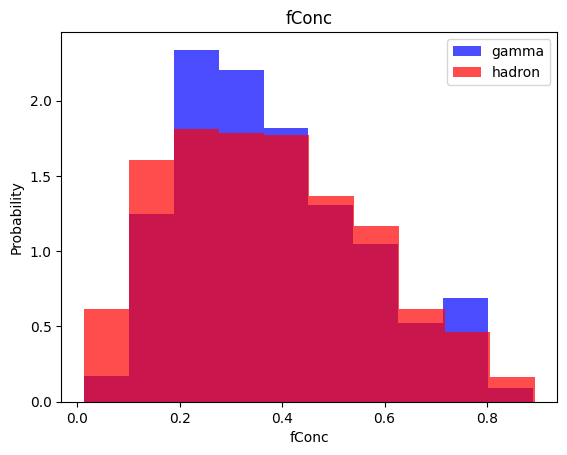

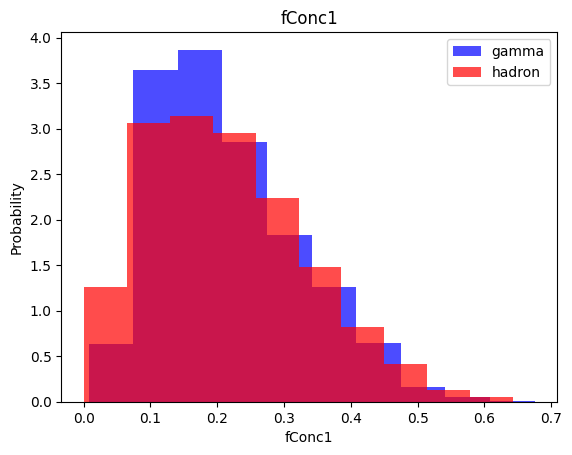

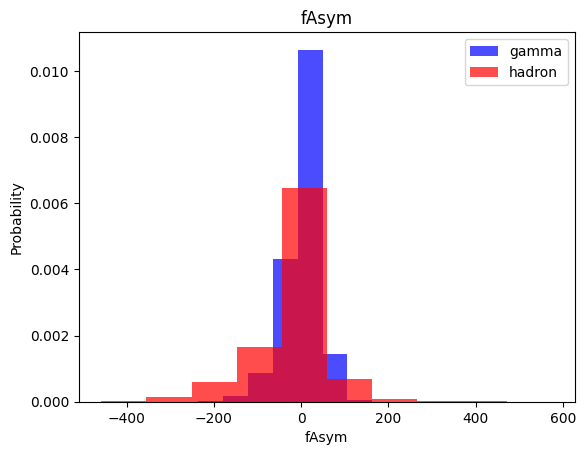

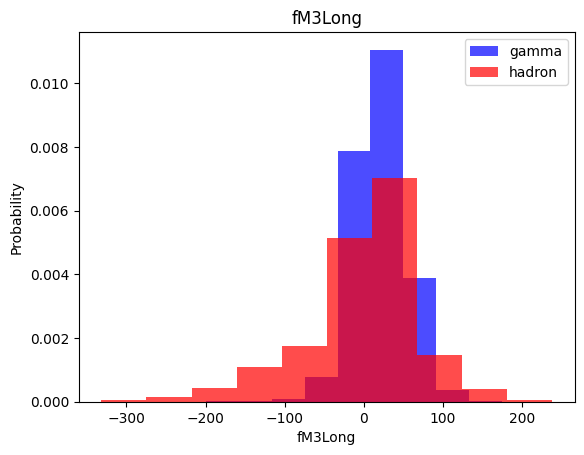

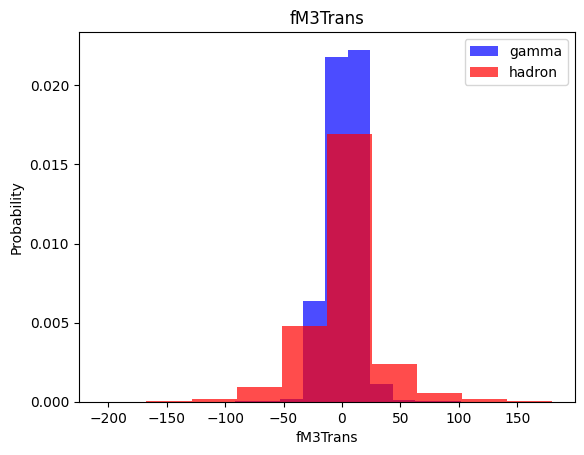

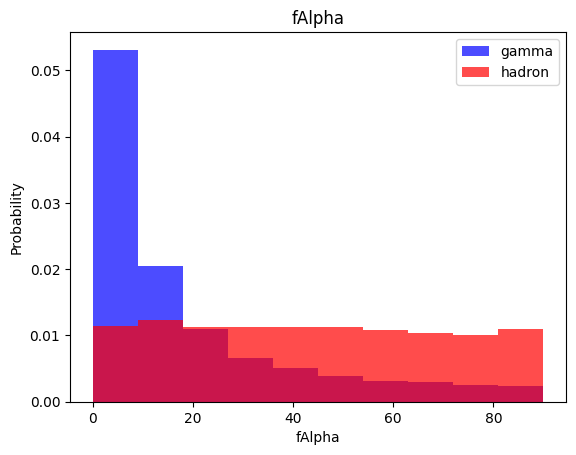

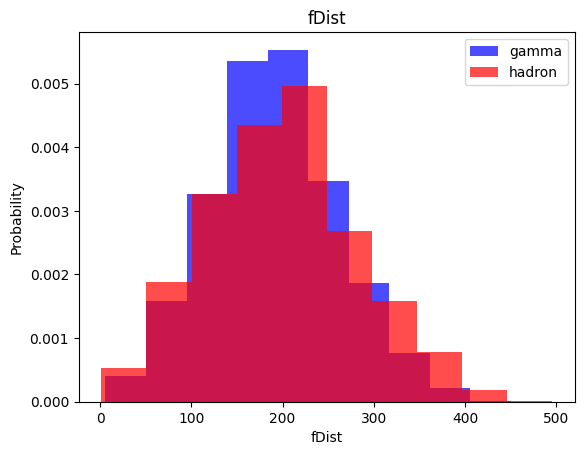

In [ ]:
for label in cols[:-1]:
  plt.hist(data[data['class']==0][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(data[data['class']==1][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
train, valid = train_test_split(train, test_size=0.25, random_state=42, stratify=train['class']) # 0.25 x 0.8 = 0.2


In [ ]:
def scaled_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaled_values = StandardScaler()
  X=scaled_values.fit_transform(x)

  # Drop rows with NaN values in the target variable
  nan_indices = np.isnan(y)
  x = x[~nan_indices]
  y = y[~nan_indices]

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y,(-1,1))))
  return data, X,y



In [ ]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

4012
7400


In [ ]:
train, X_train, y_train = scaled_dataset(train, oversample=True)
test, X_test, y_test = scaled_dataset(test, oversample=False)
valid, X_valid, y_valid = scaled_dataset(valid, oversample=False)

##KNN


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2466
           1       0.80      0.71      0.75      1338

    accuracy                           0.84      3804
   macro avg       0.83      0.81      0.81      3804
weighted avg       0.83      0.84      0.83      3804



In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([2466, 1338]))

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_mdoel = GaussianNB()
nb_mdoel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_mdoel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2466
           1       0.67      0.41      0.51      1338

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2466
           1       0.70      0.73      0.71      1338

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



##SVMs


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2466
           1       0.81      0.80      0.81      1338

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



##NEURAL NETWORK

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

In [ ]:
def train_model(X_train, y_train, num_epochs, num_neurons,
                learning_rate, batch_size, dropout_rate):
  tf.random.set_seed(1234)
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_neurons, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_neurons, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=num_epochs,
                       batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

16nodes, 0dropout,learning_rate0.005, batch_size32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3168
16nodes, 0dropout,learning_rate0.005, batch_size64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3148
16nodes, 0dropout,learning_rate0.005, batch_size128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3087
16nodes, 0dropout,learning_rate0.001, batch_size32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3172
16nodes, 0dropout,learning_rate0.001, batch_size64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3156
16nodes, 0dropout,learning_rate0.001, batch_size128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3263
16nodes, 0dropout,learning_rate0.1, batch_size32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3516
16nodes, 0dropout,learning_rate0.1, batch_size64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3553
16nodes, 0dropout,learning_rate0.1, batch_siz

<ipython-input-27-9271fd953b3a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.3441
16nodes, 0.5dropout,learning_rate0.001, batch_size32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3432
16nodes, 0.5dropout,learning_rate0.001, batch_size64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3489
16nodes, 0.5dropout,learning_rate0.001, batch_size128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3481
16nodes, 0.5dropout,learning_rate0.1, batch_size32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6513
16nodes, 0.5dropout,learning_rate0.1, batch_size64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5887
16nodes, 0.5dropout,learning_rate0.1, batch_size128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7310 - loss: 0.5009
32nodes, 0dropout,learning_rate0.005, batch_size32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3762
32nodes, 0dropout,learning_rate0.00

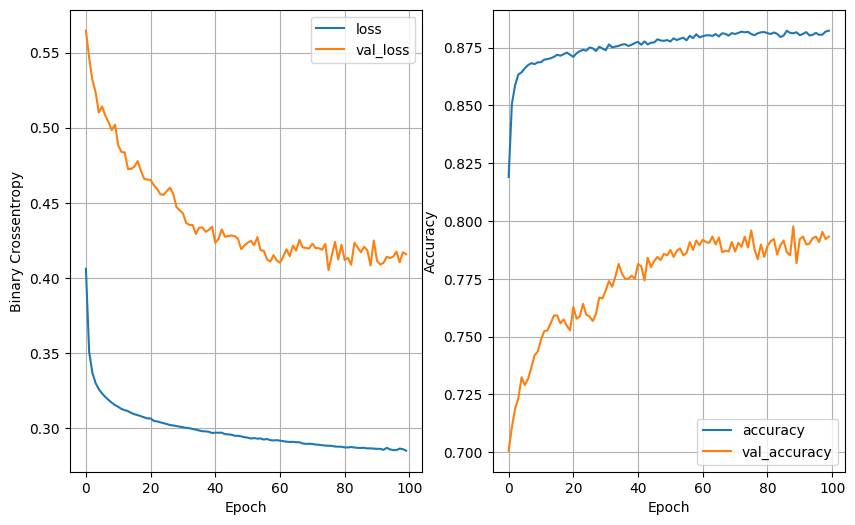

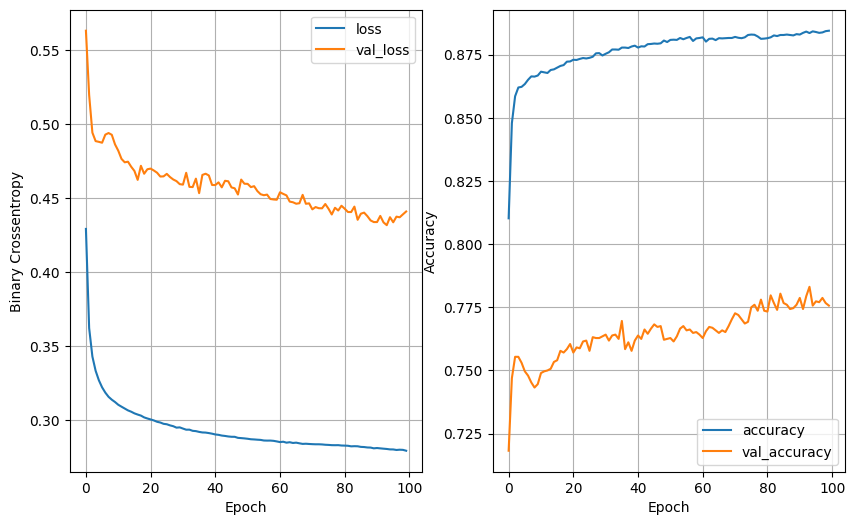

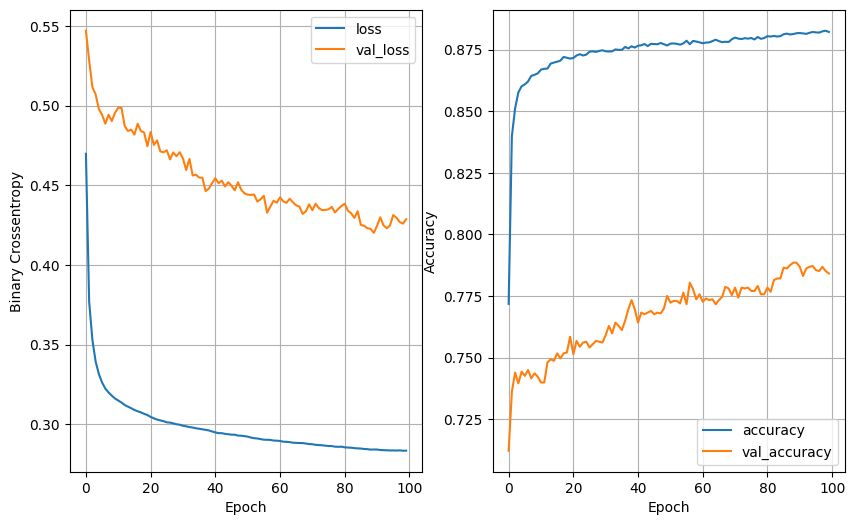

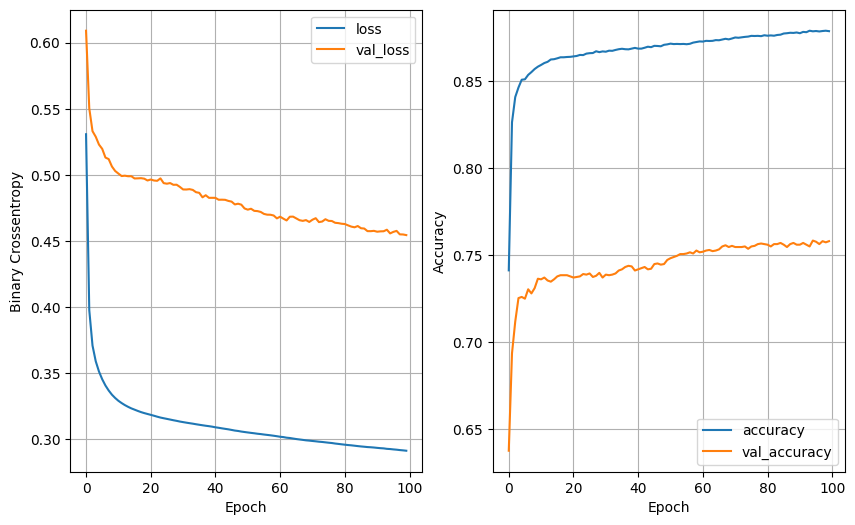

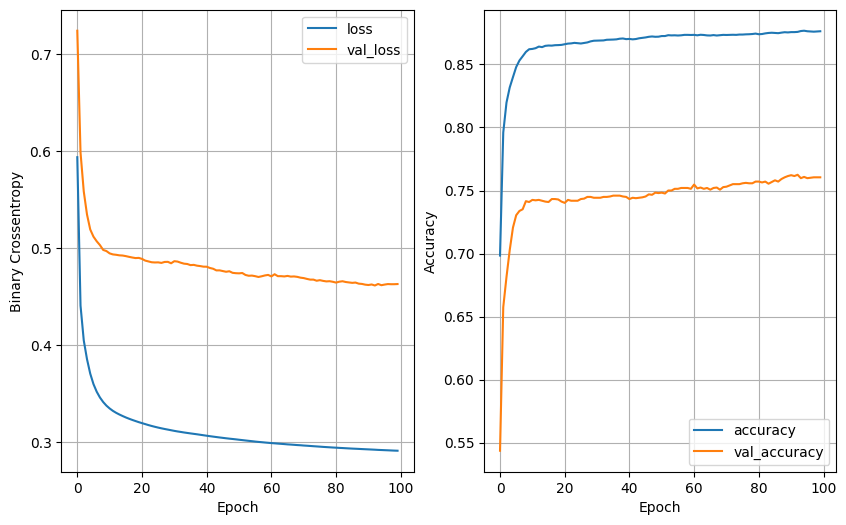

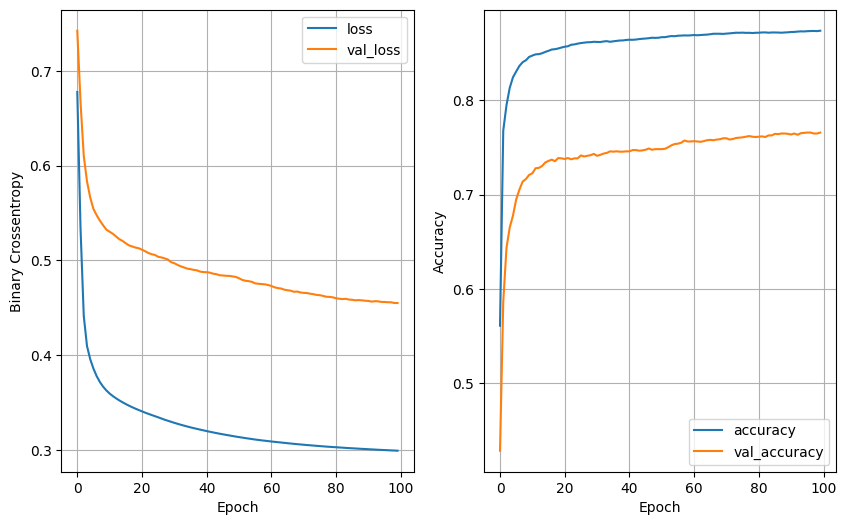

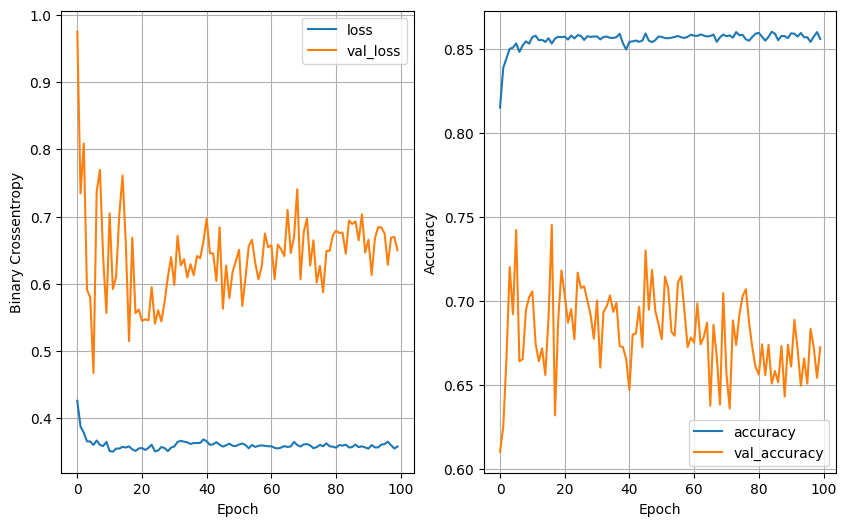

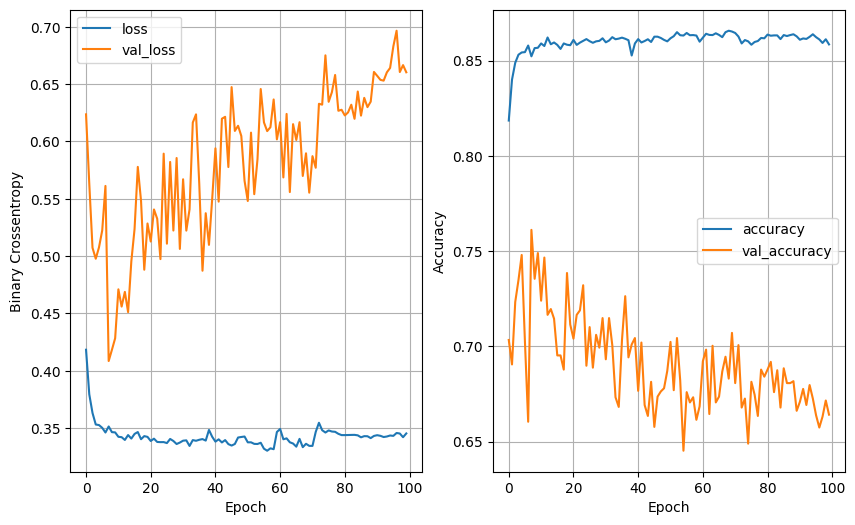

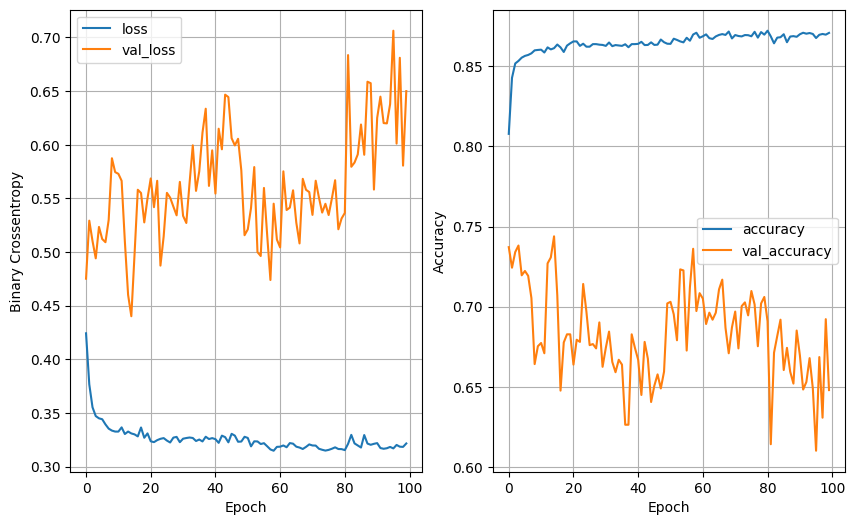

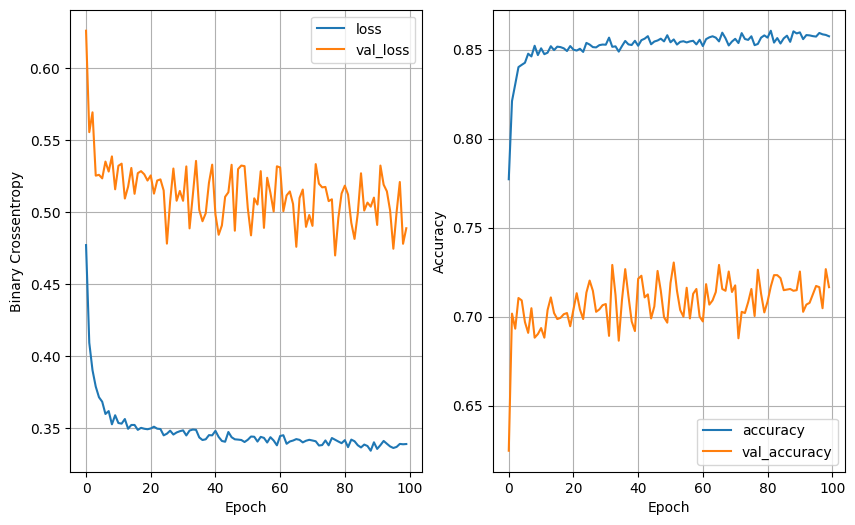

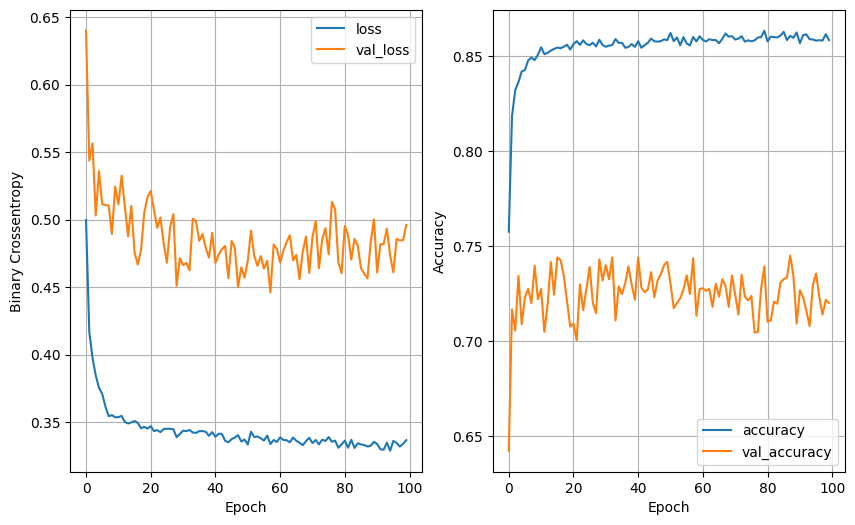

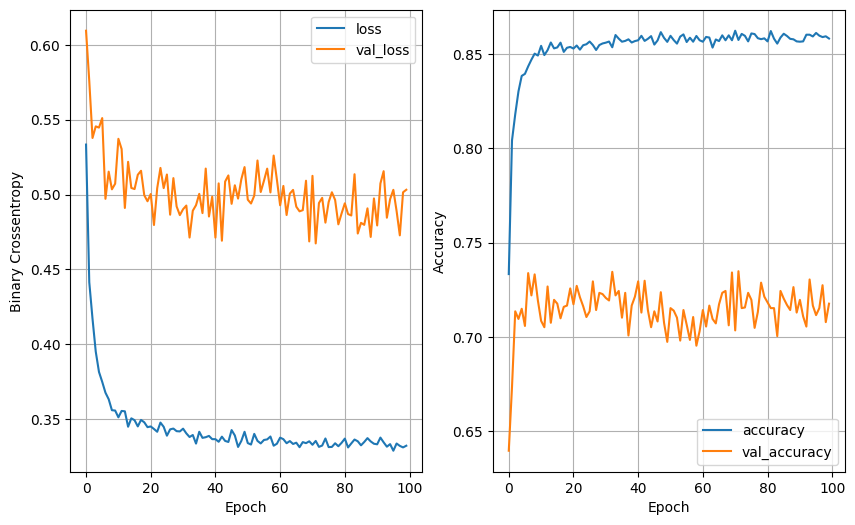

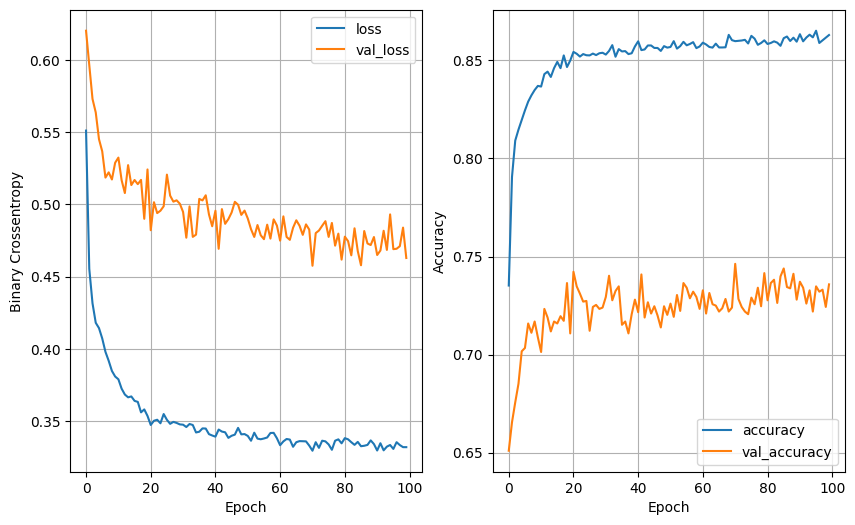

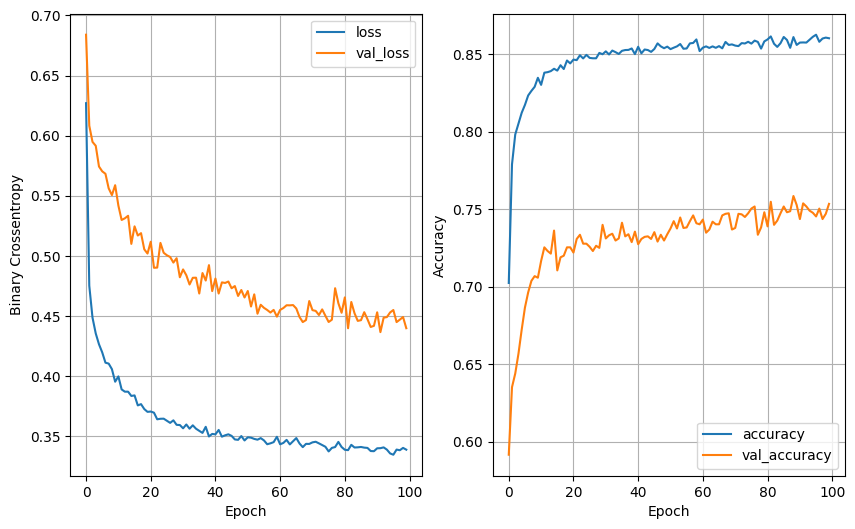

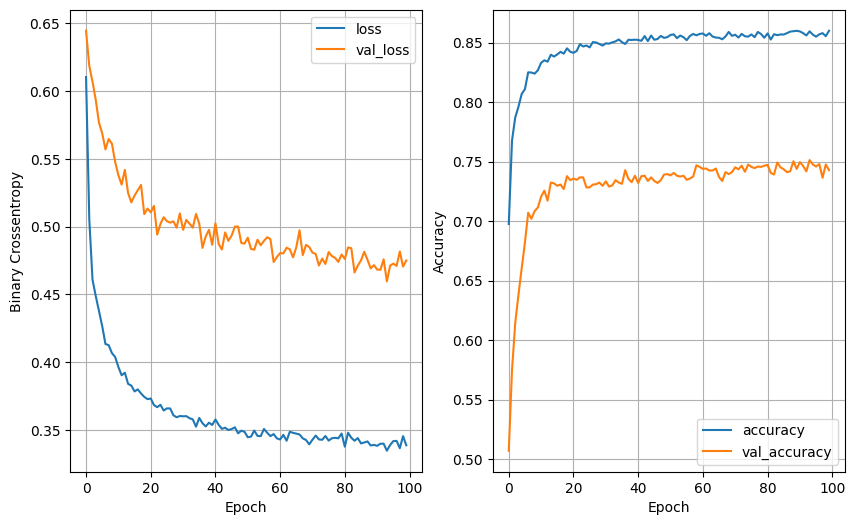

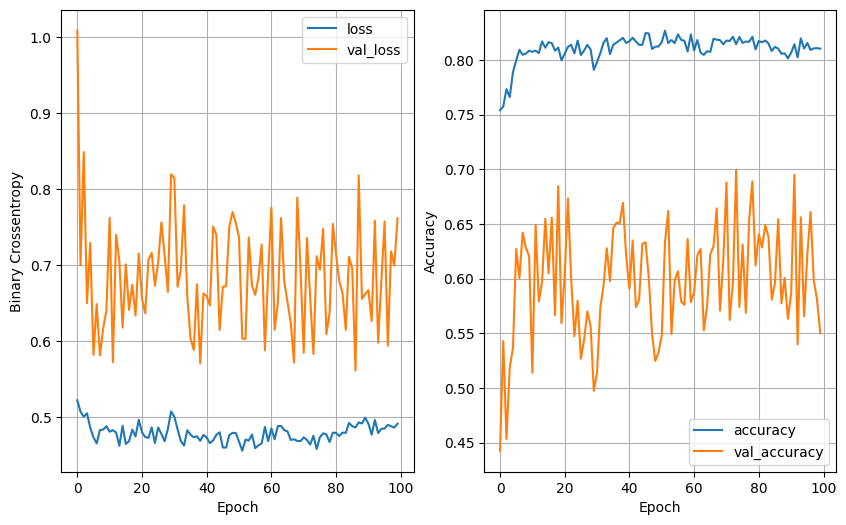

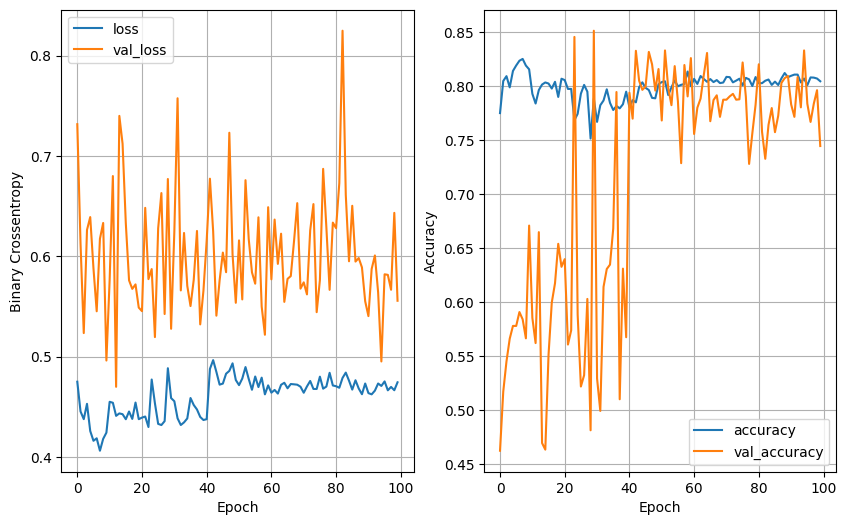

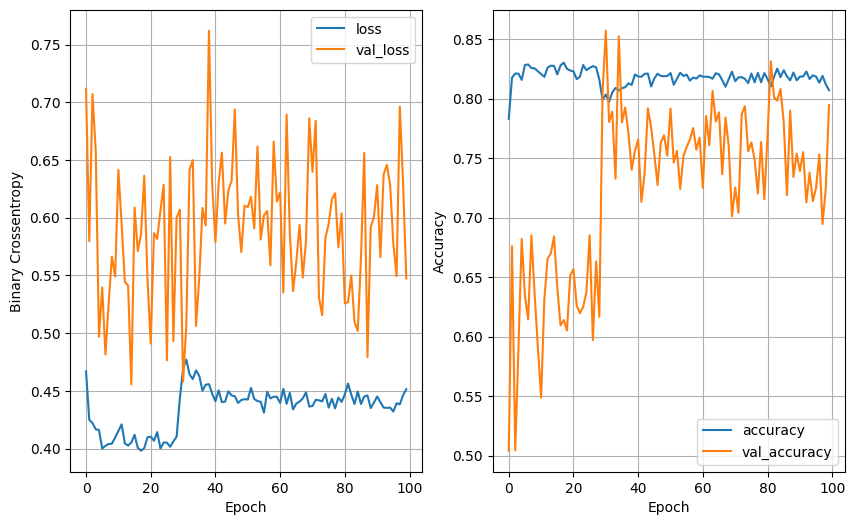

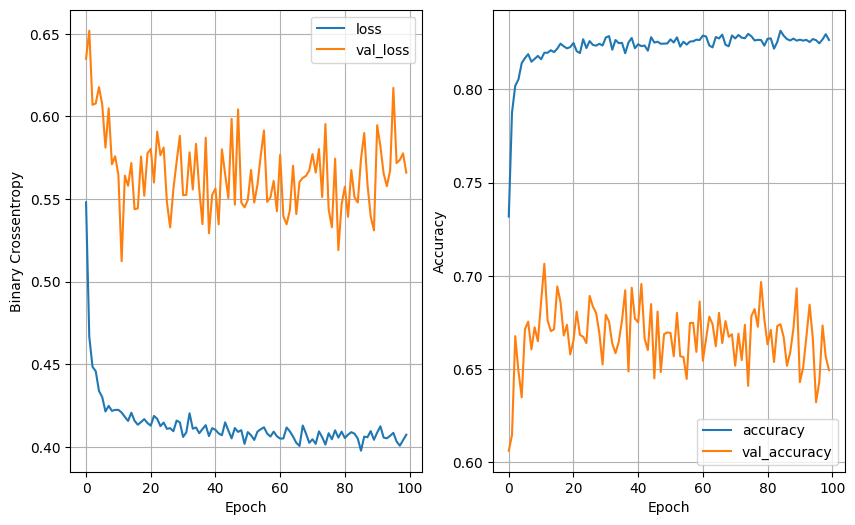

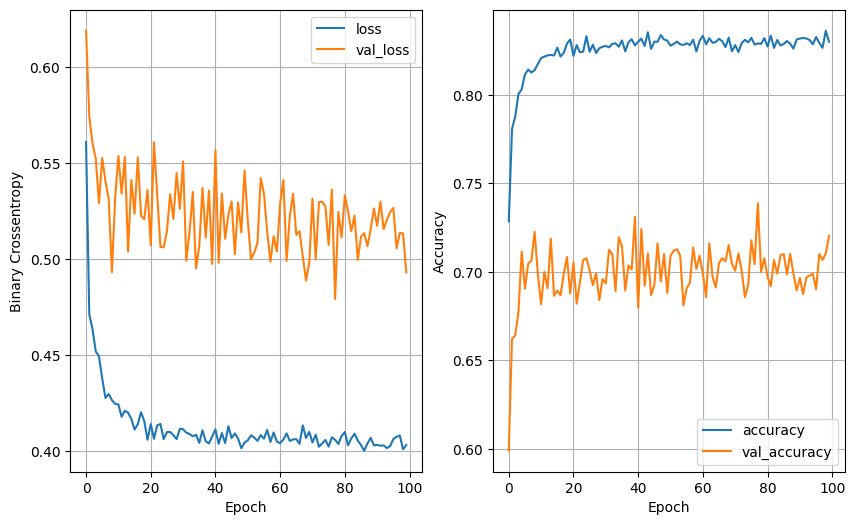

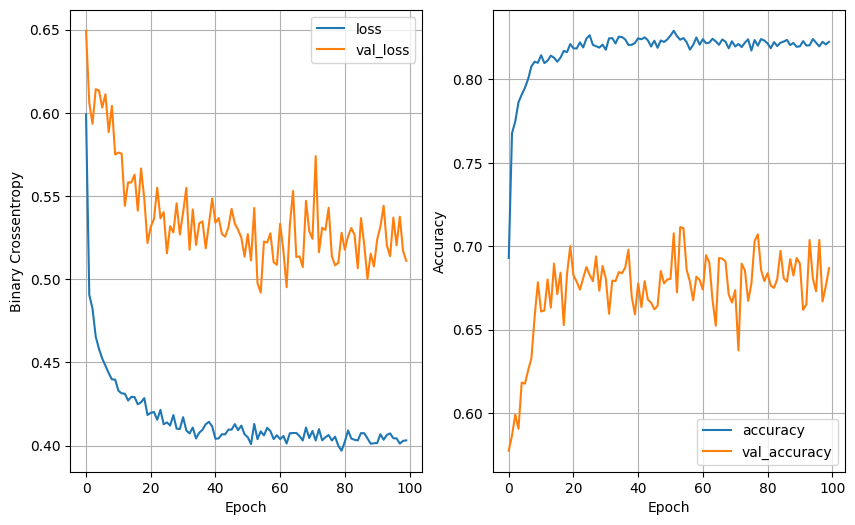

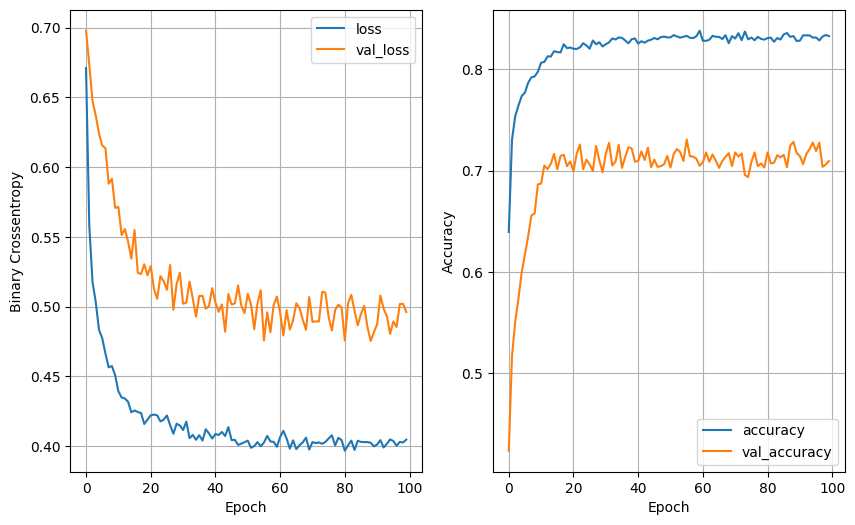

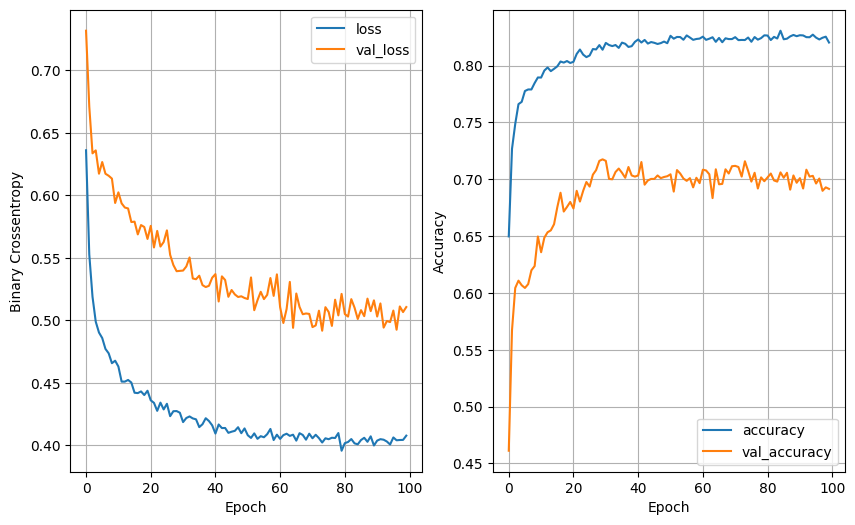

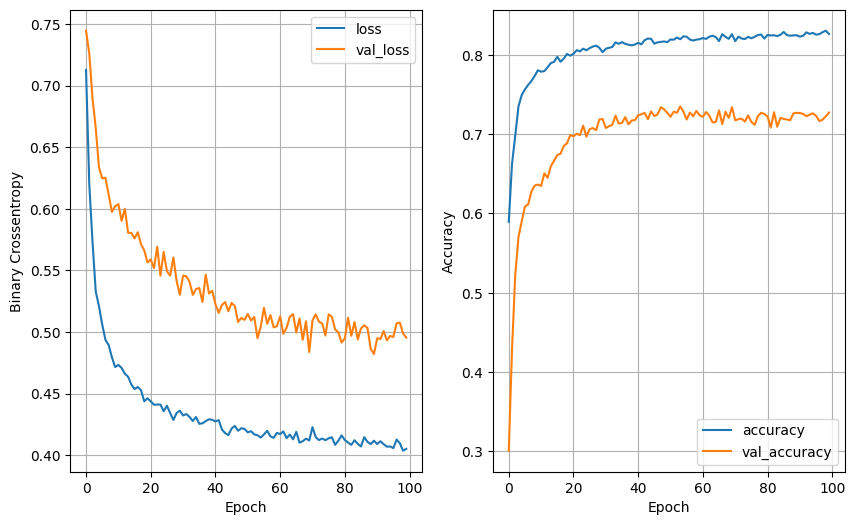

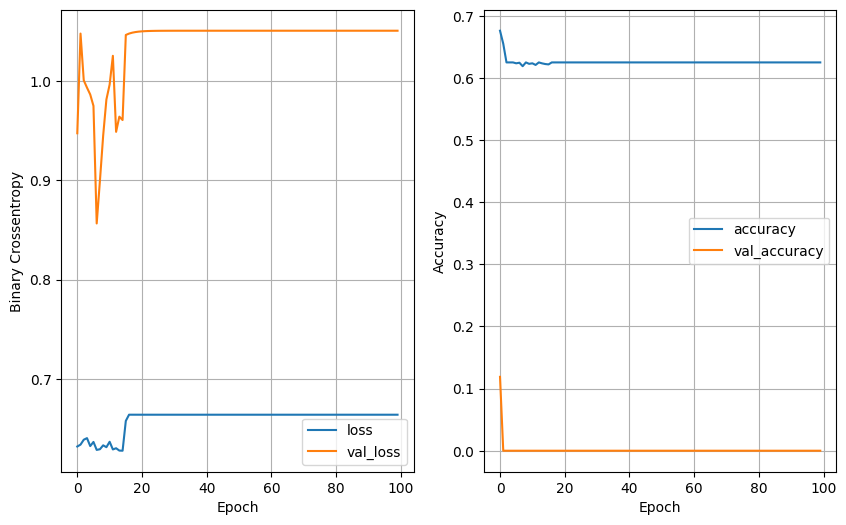

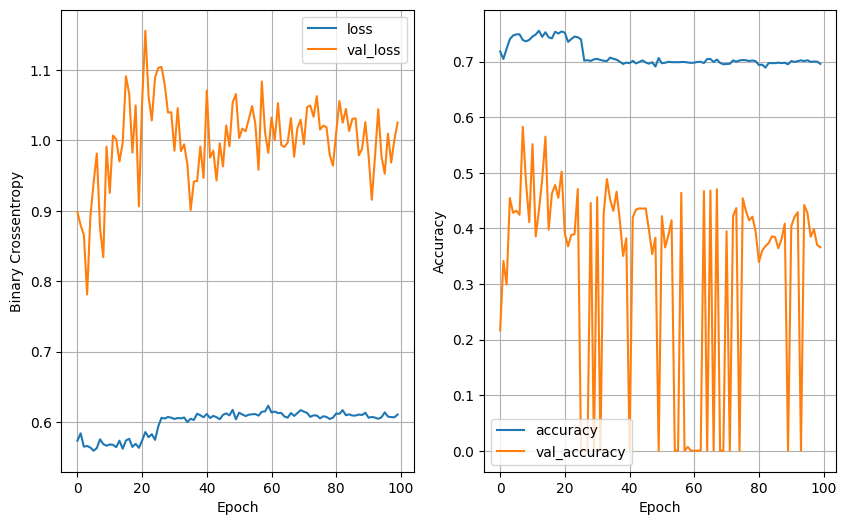

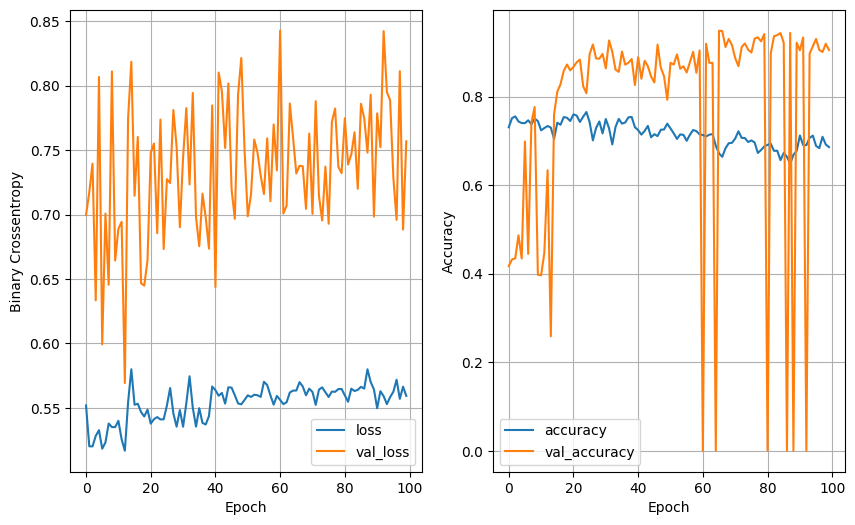

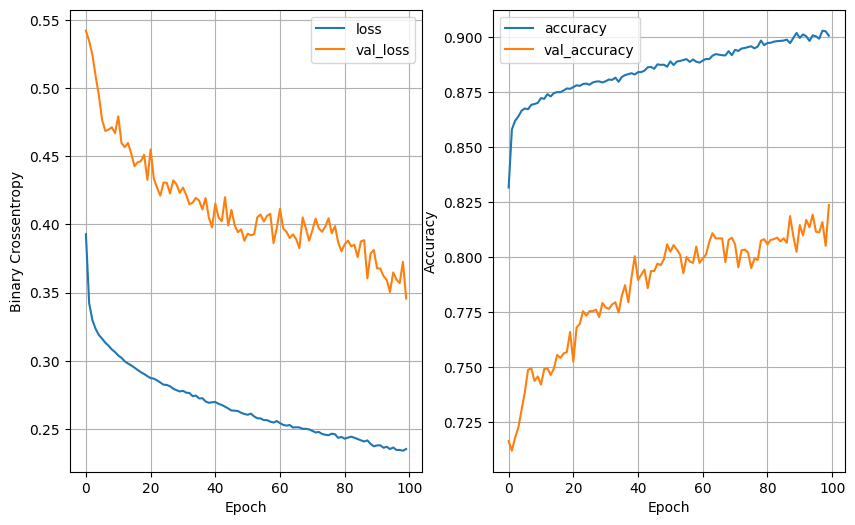

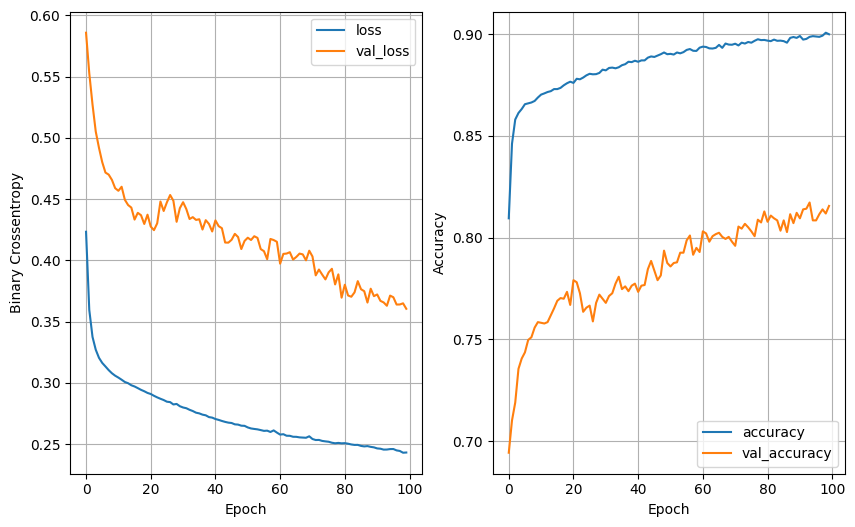

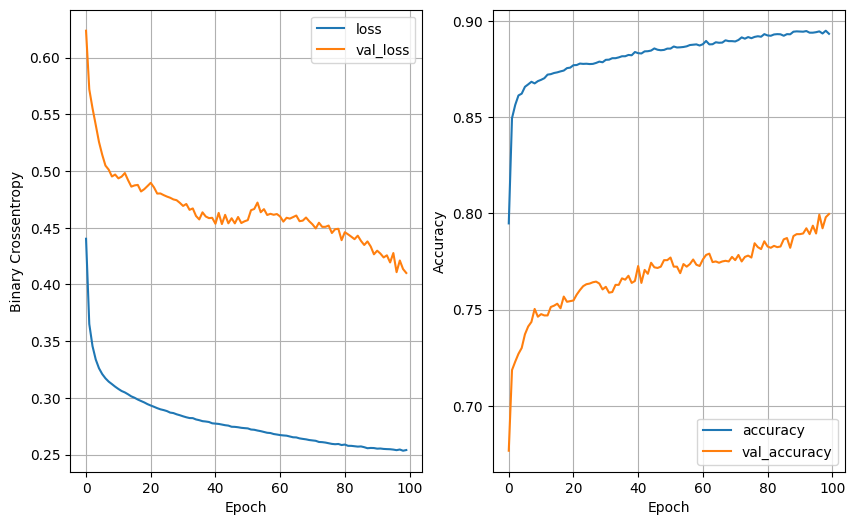

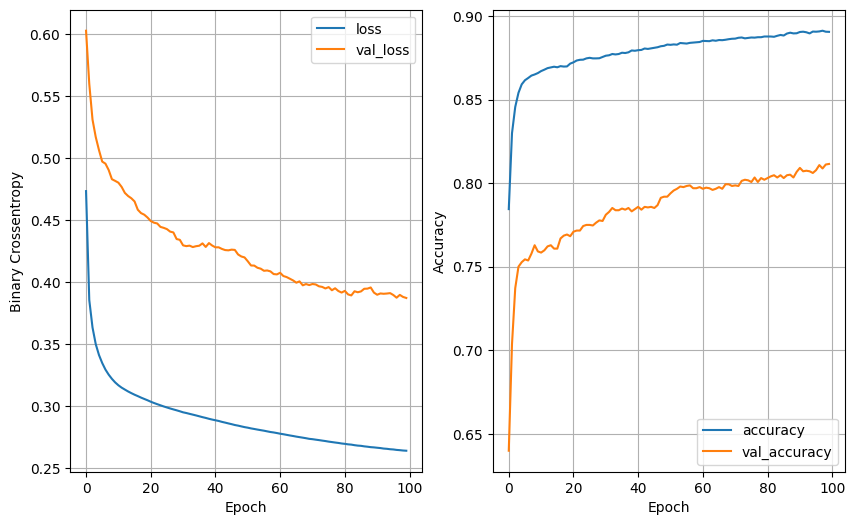

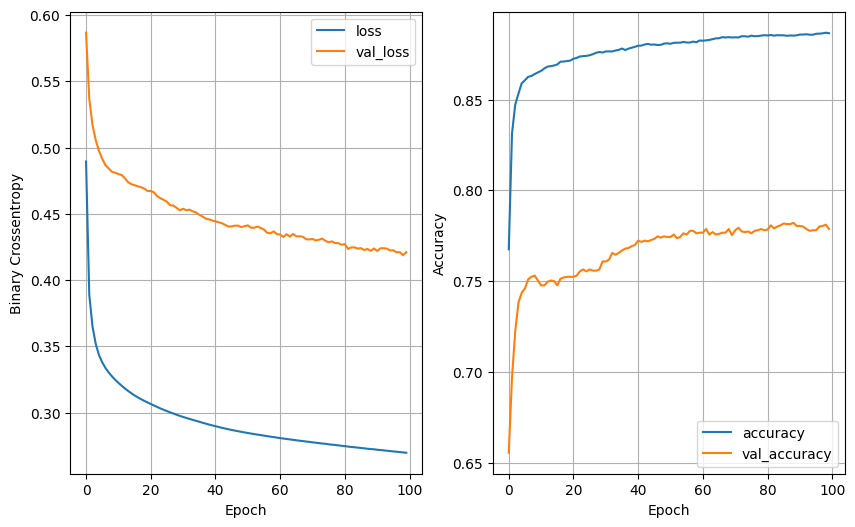

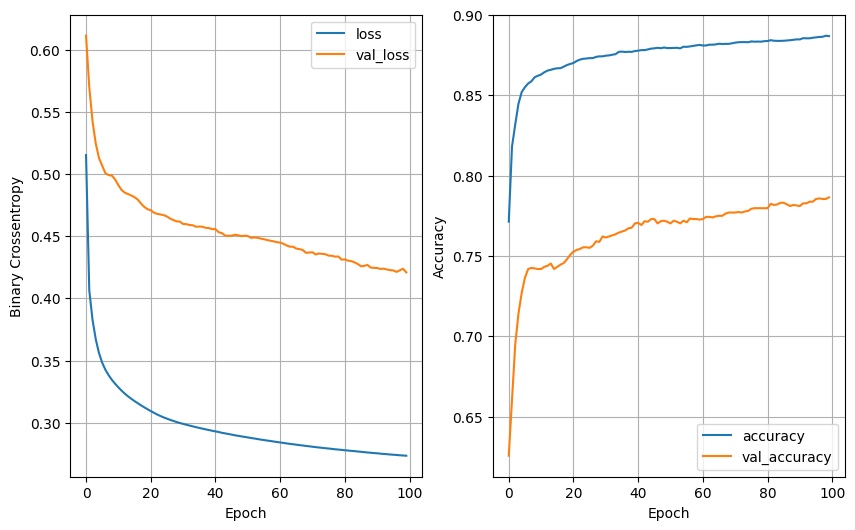

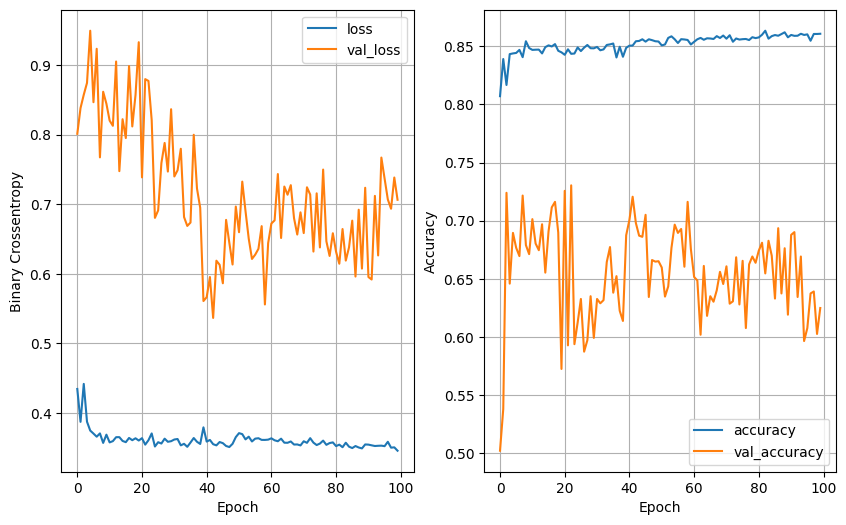

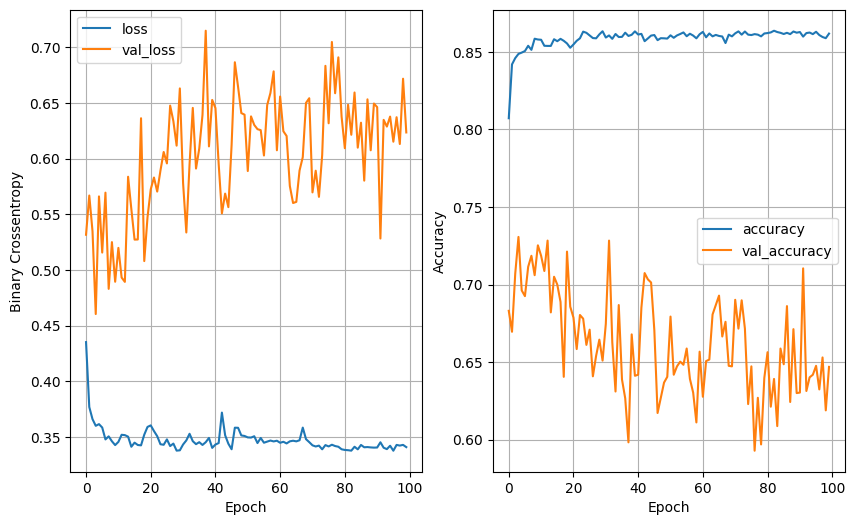

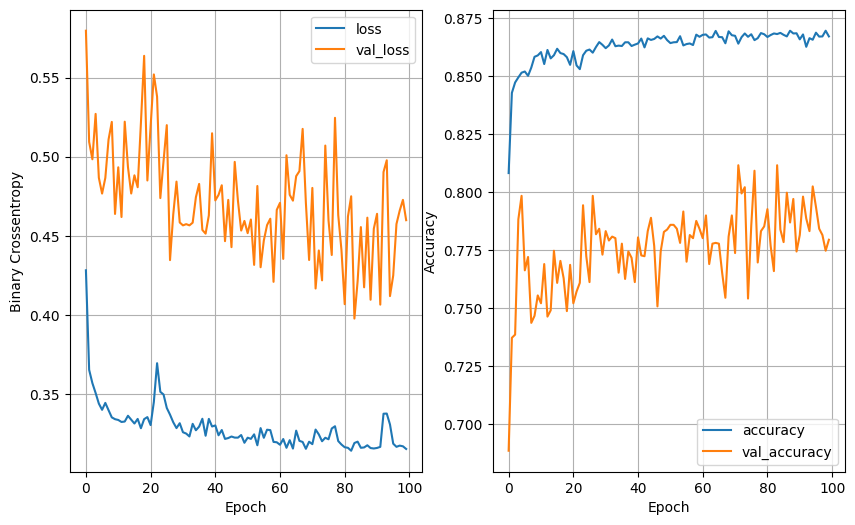

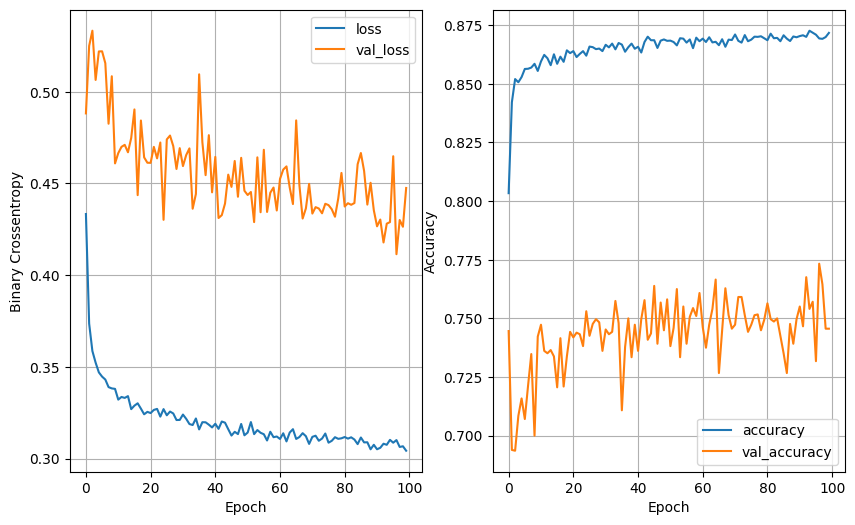

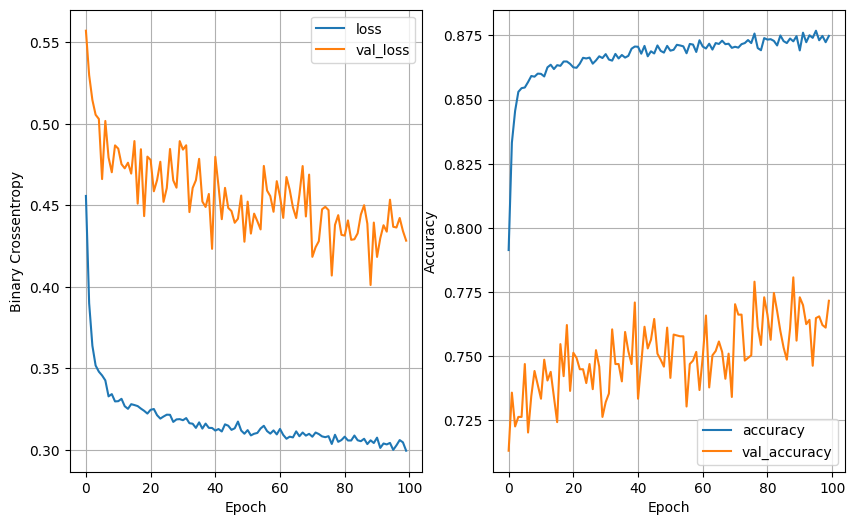

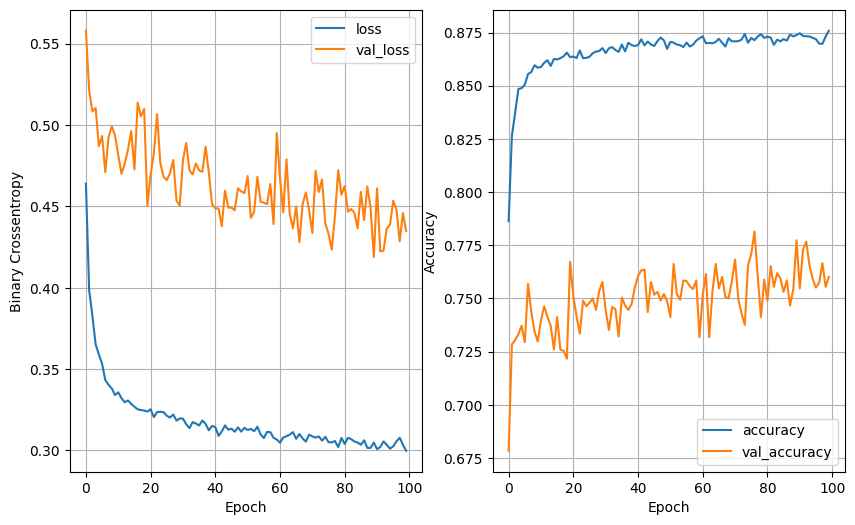

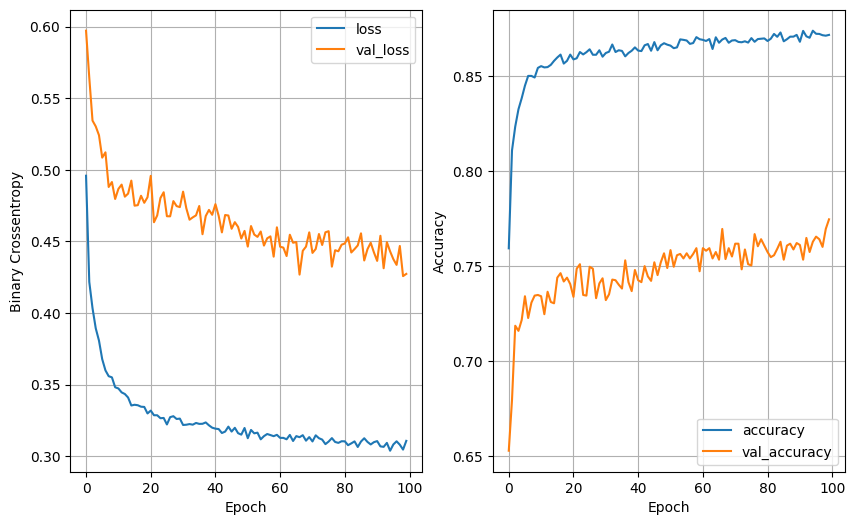

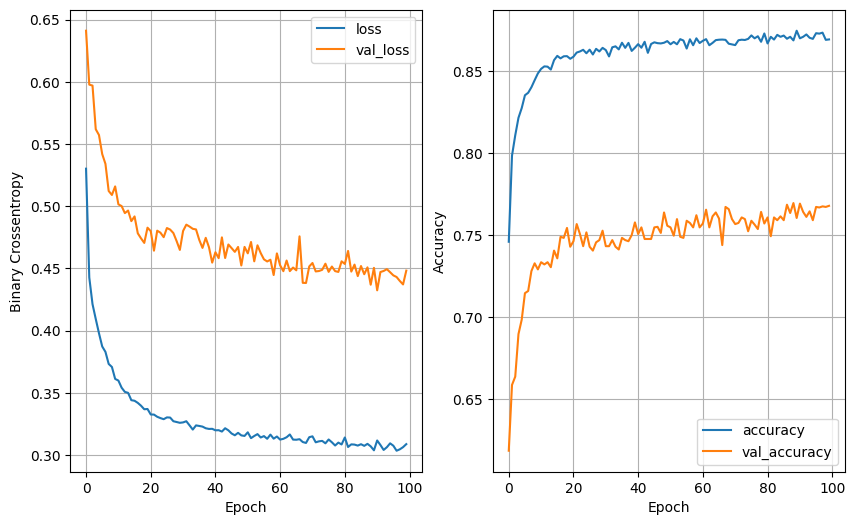

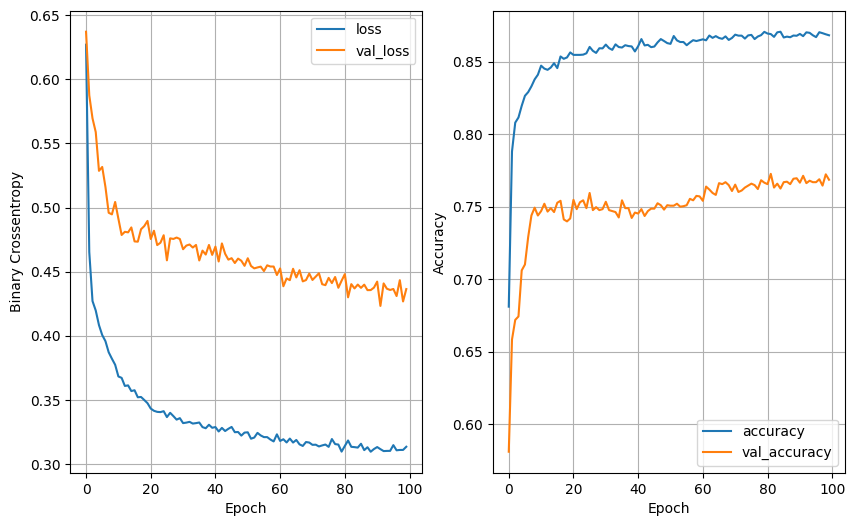

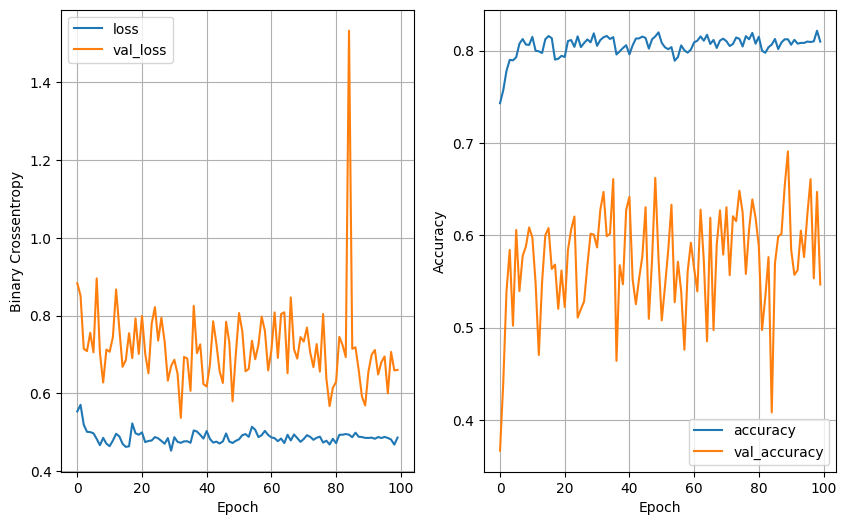

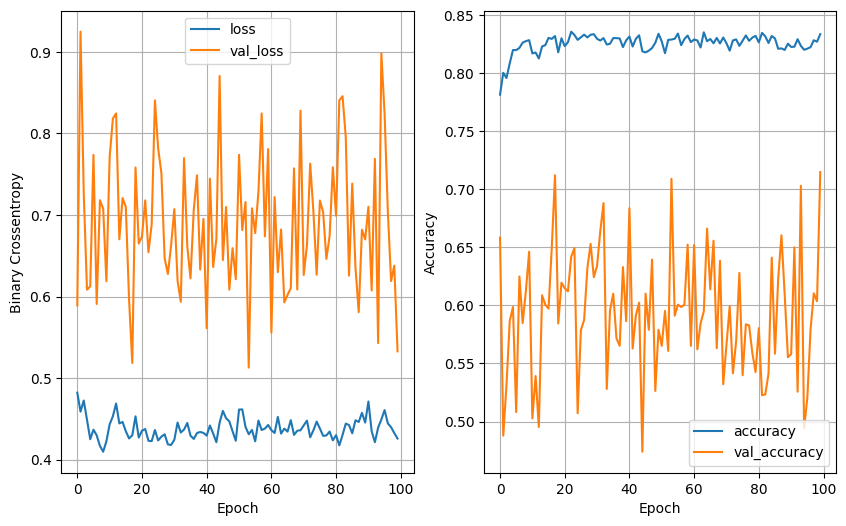

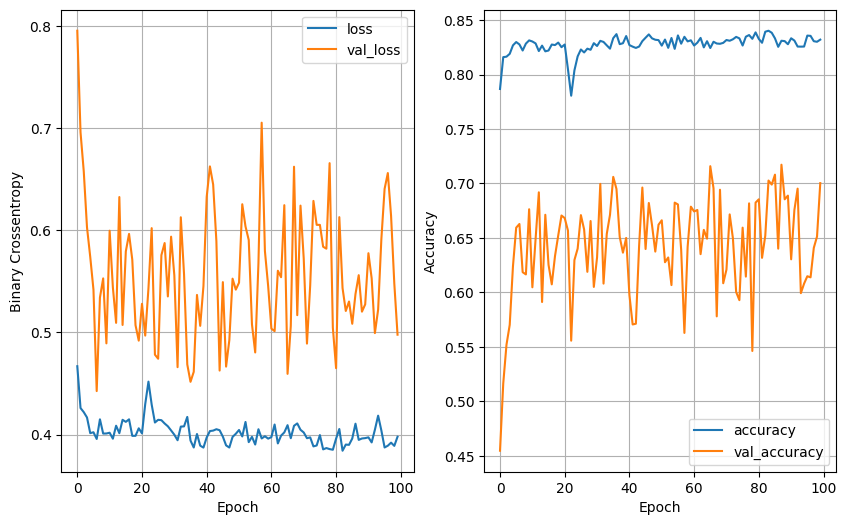

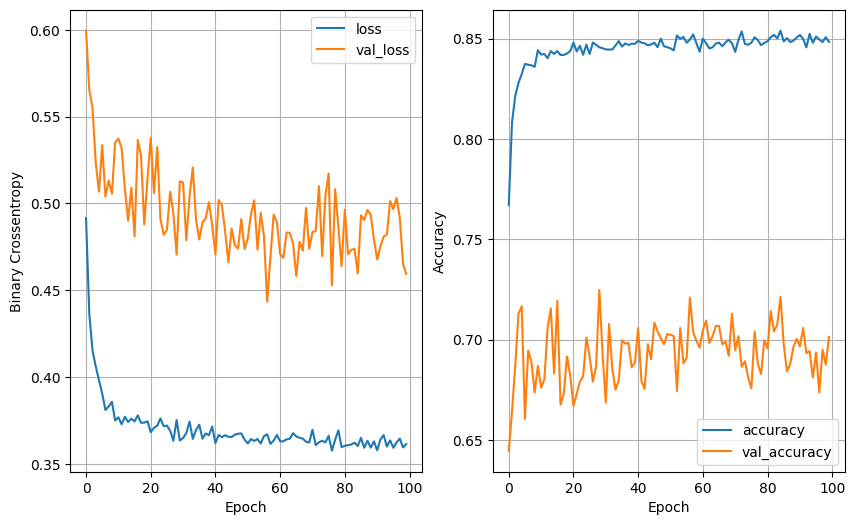

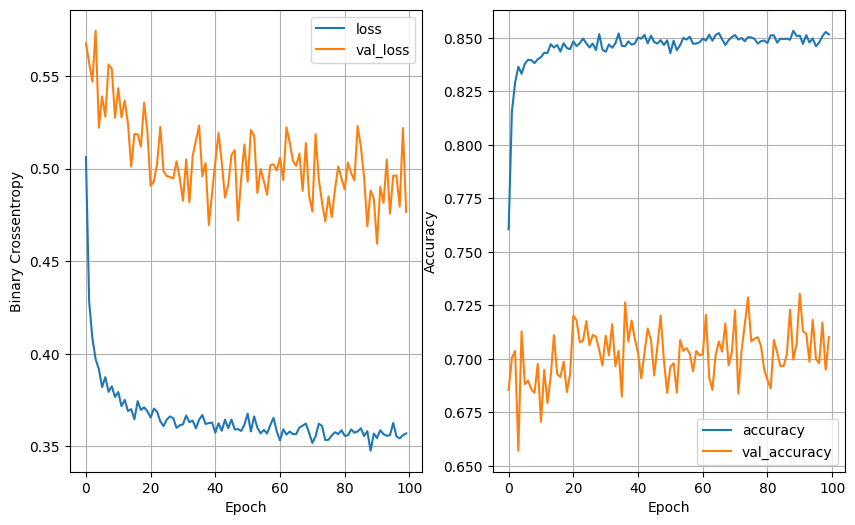

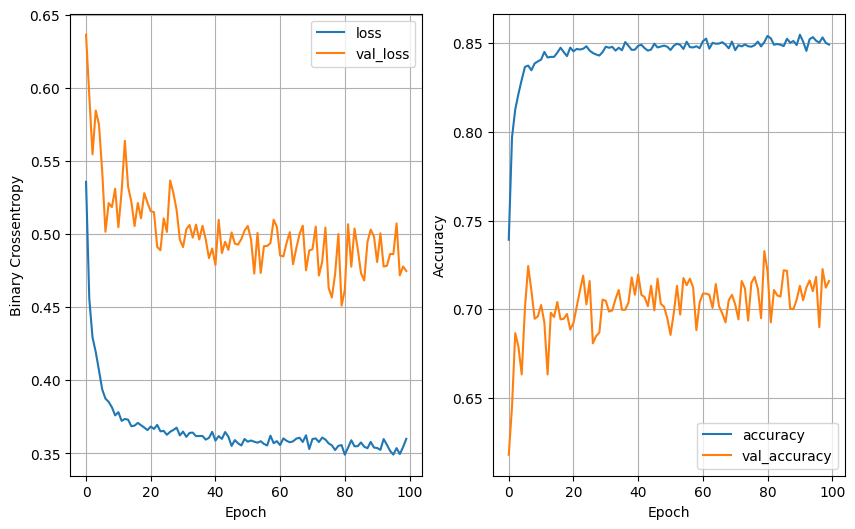

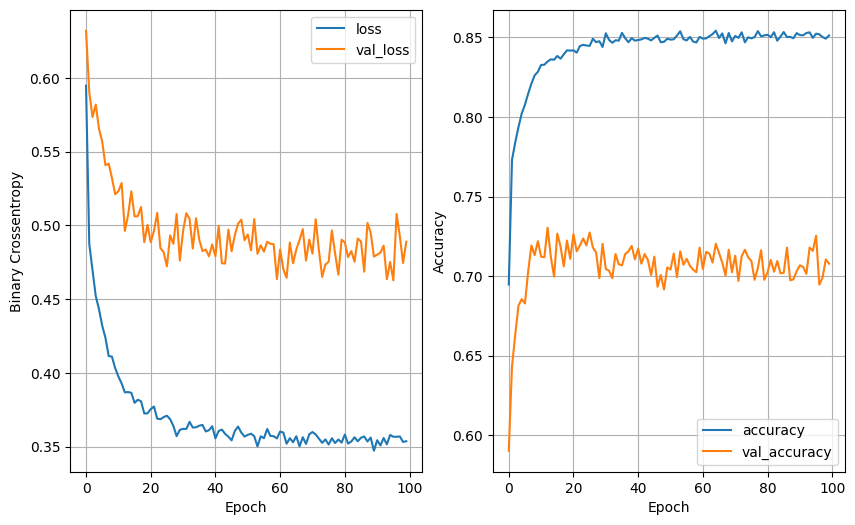

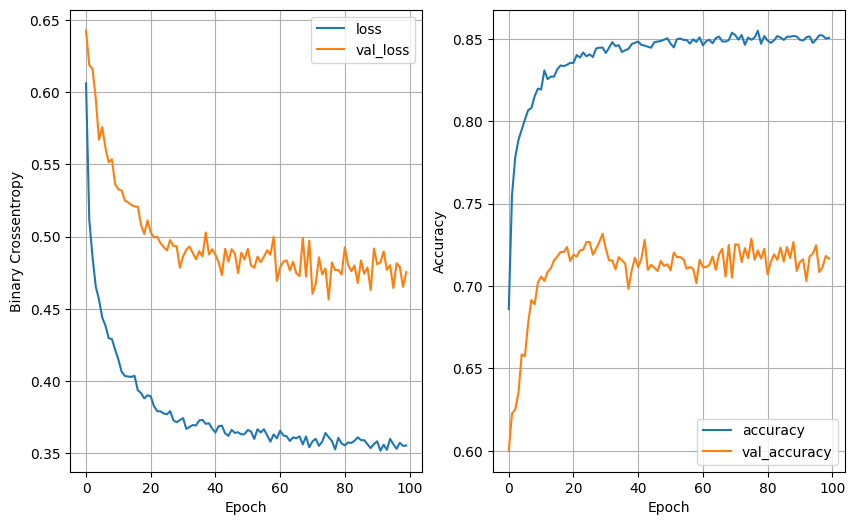

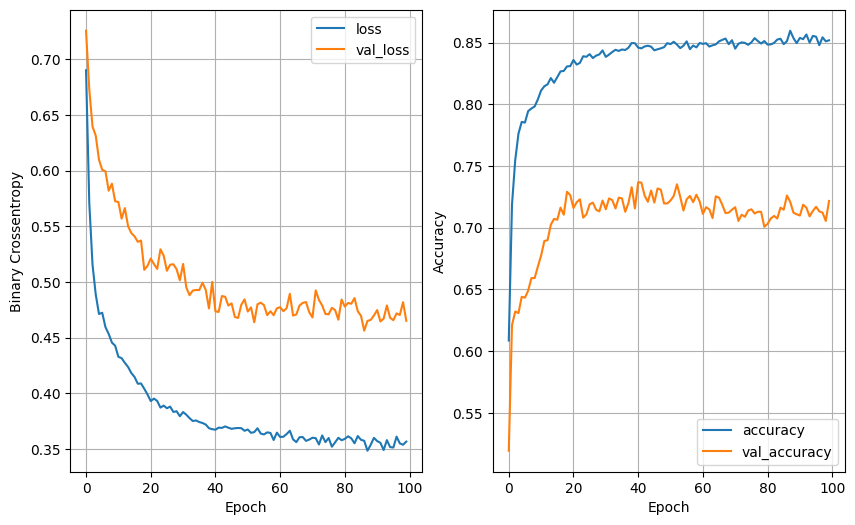

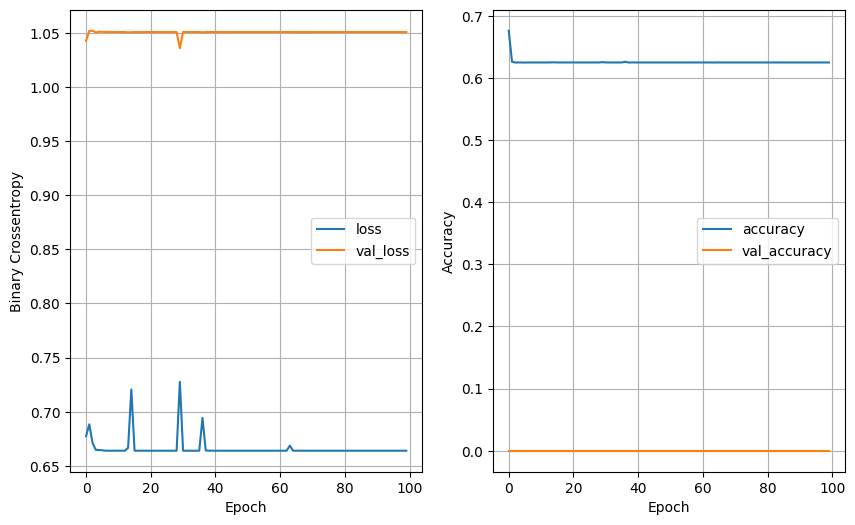

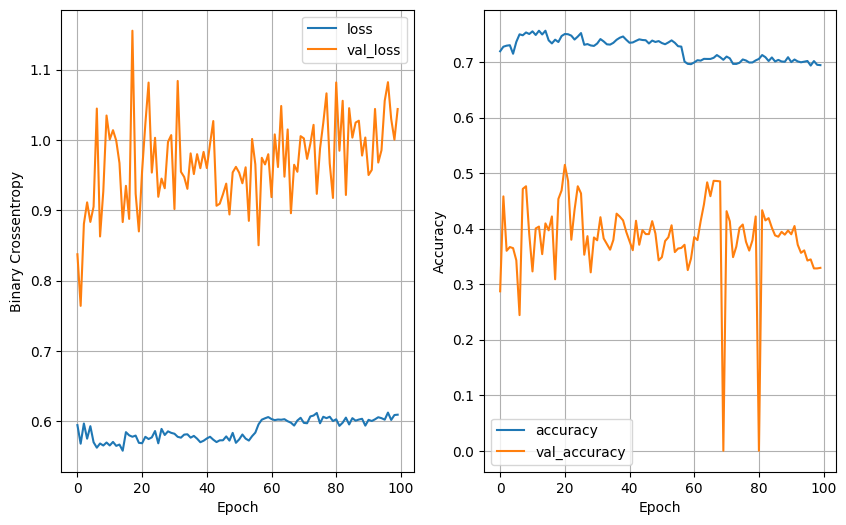

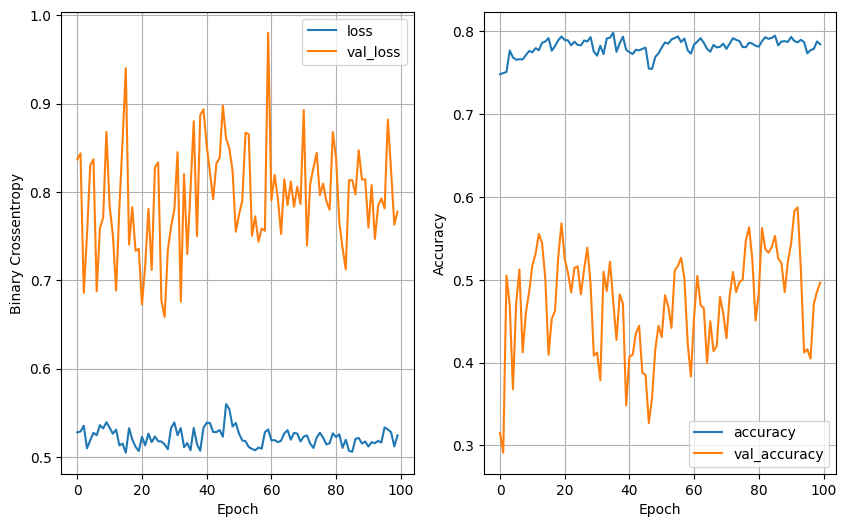

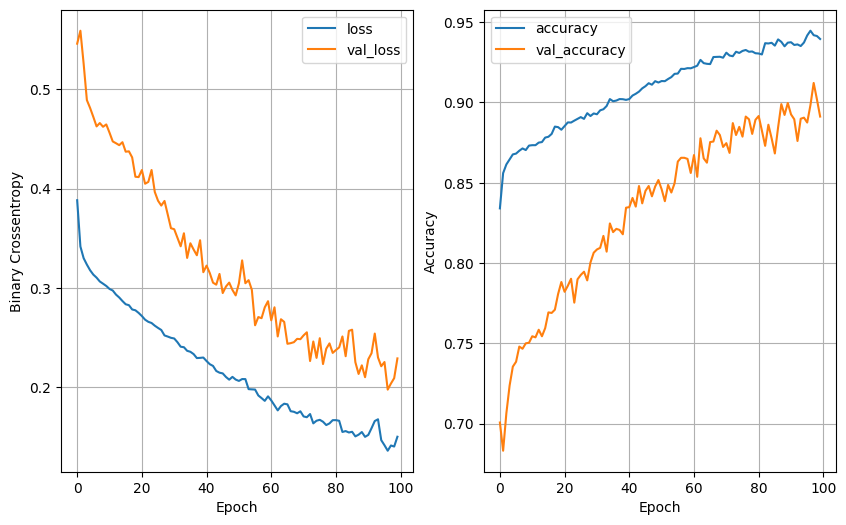

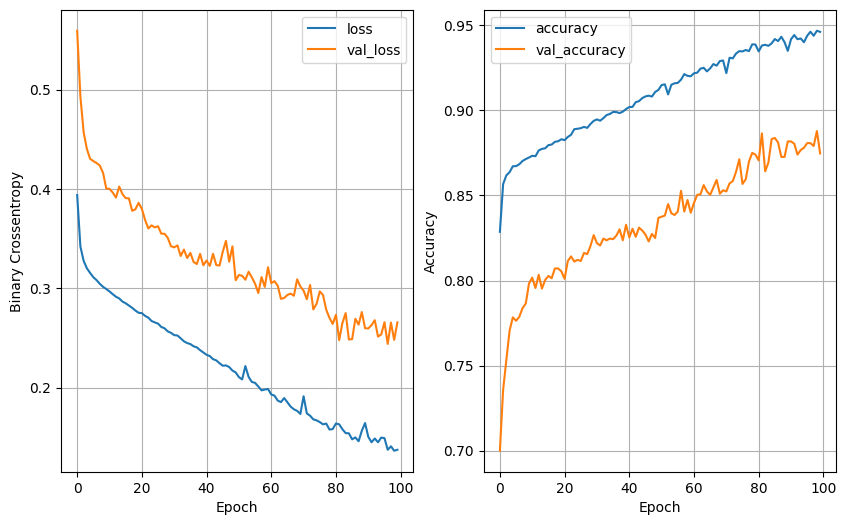

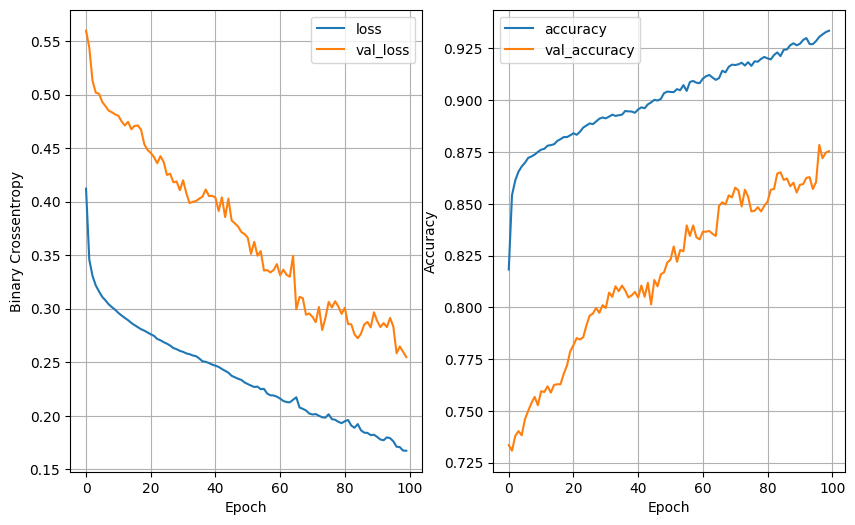

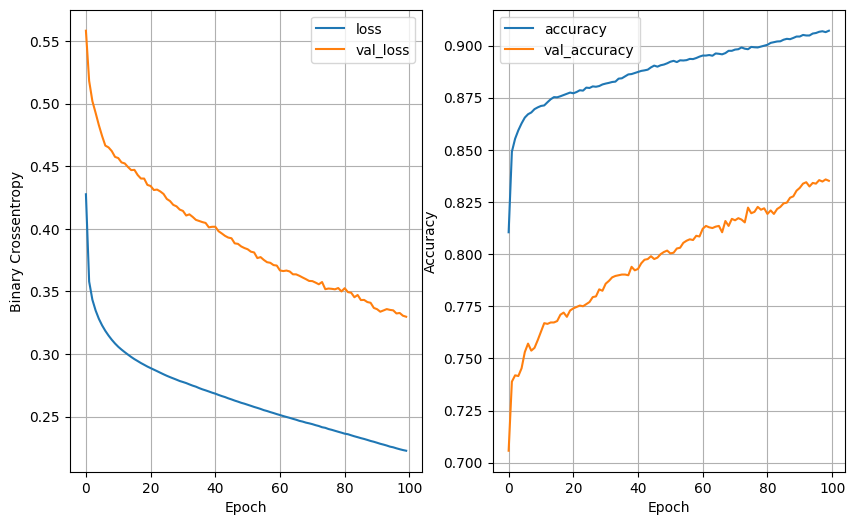

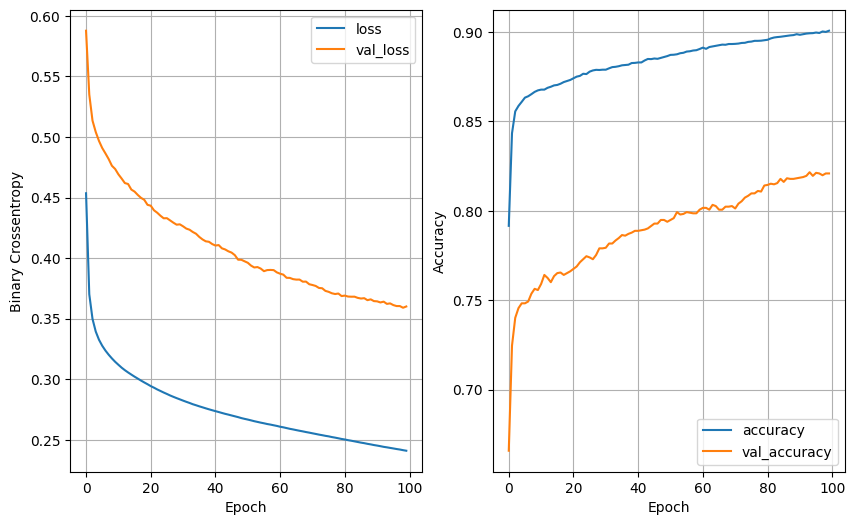

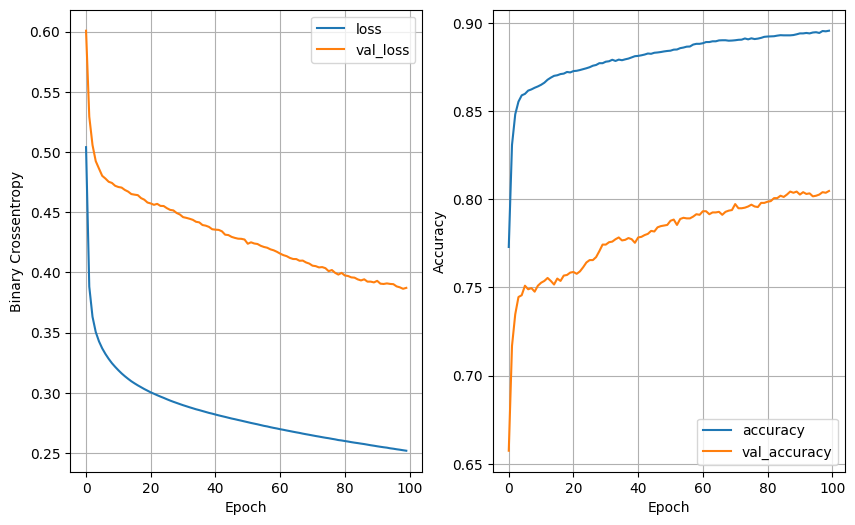

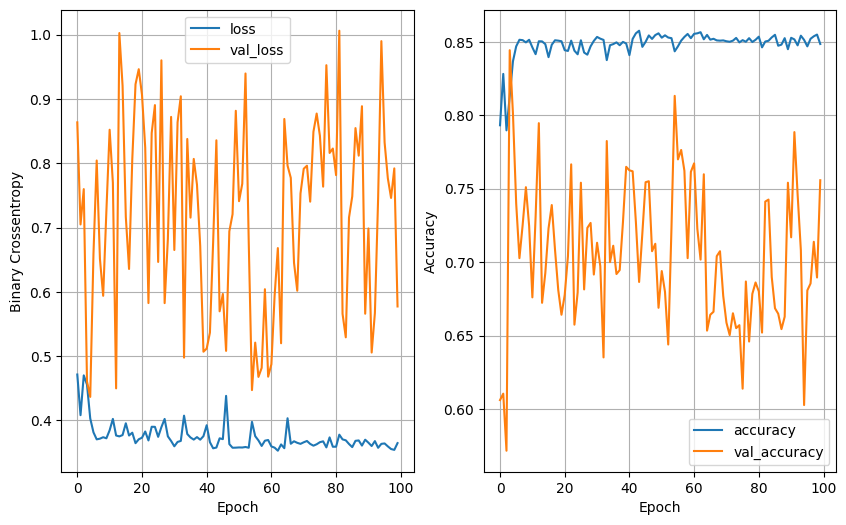

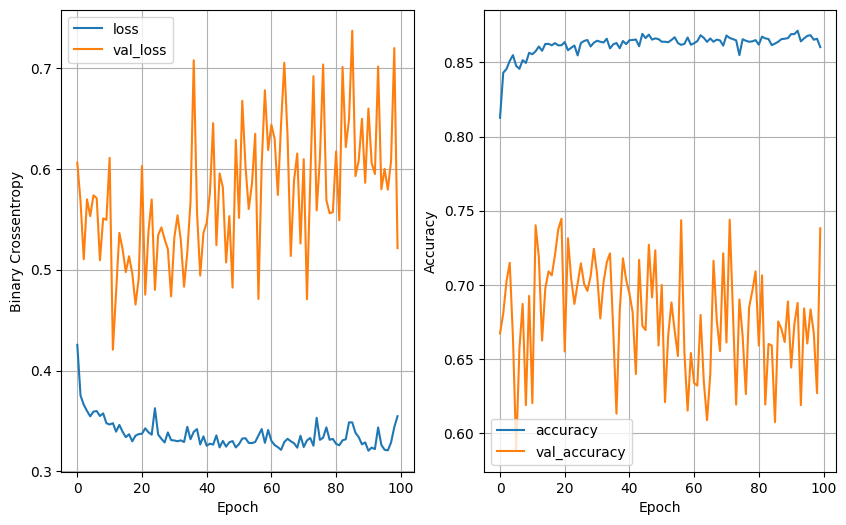

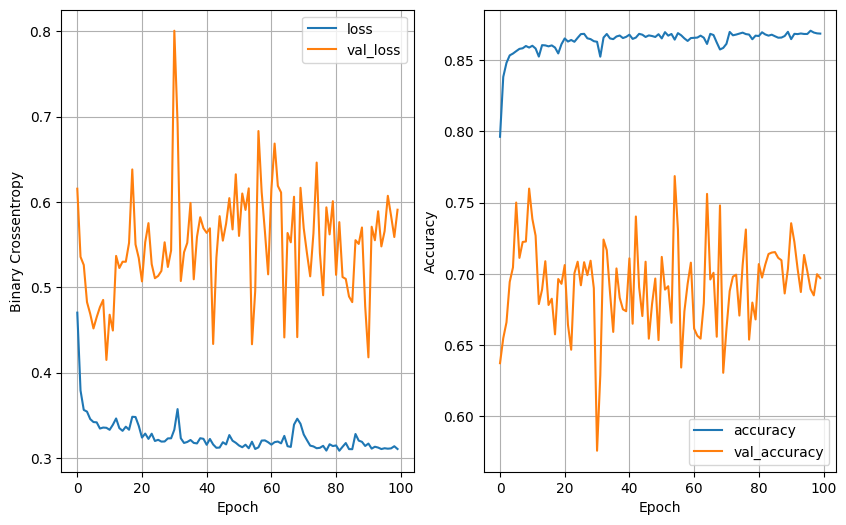

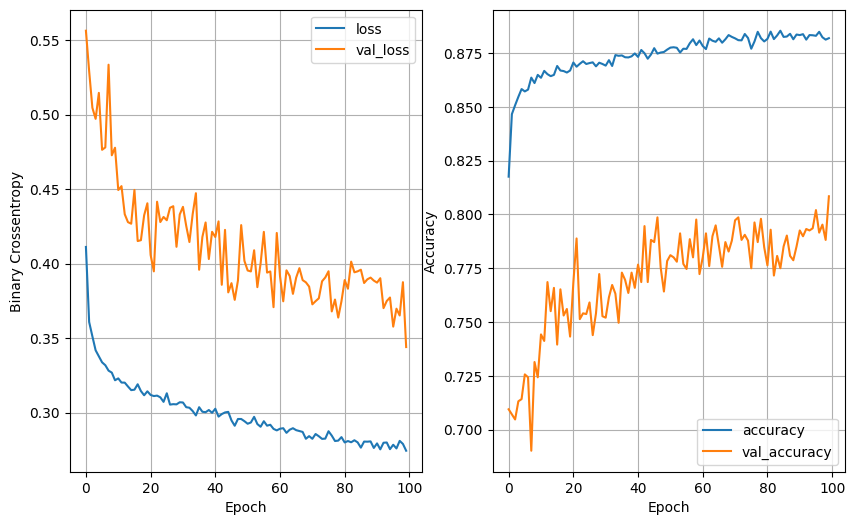

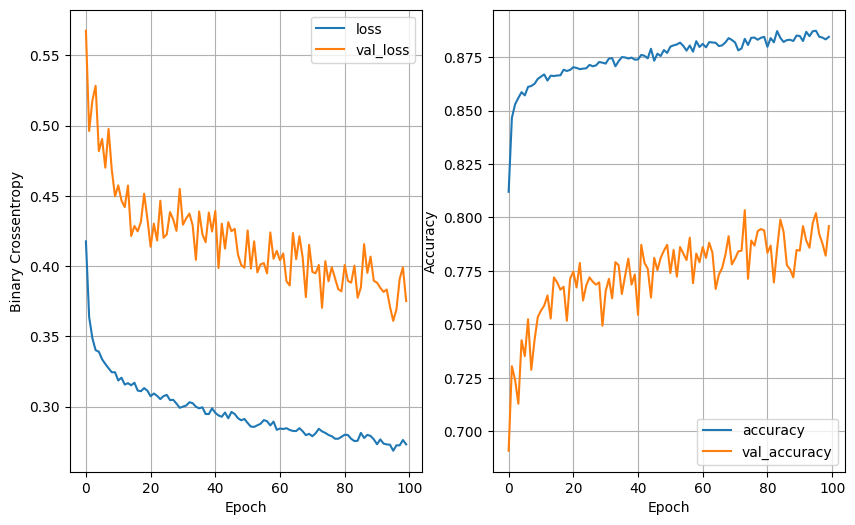

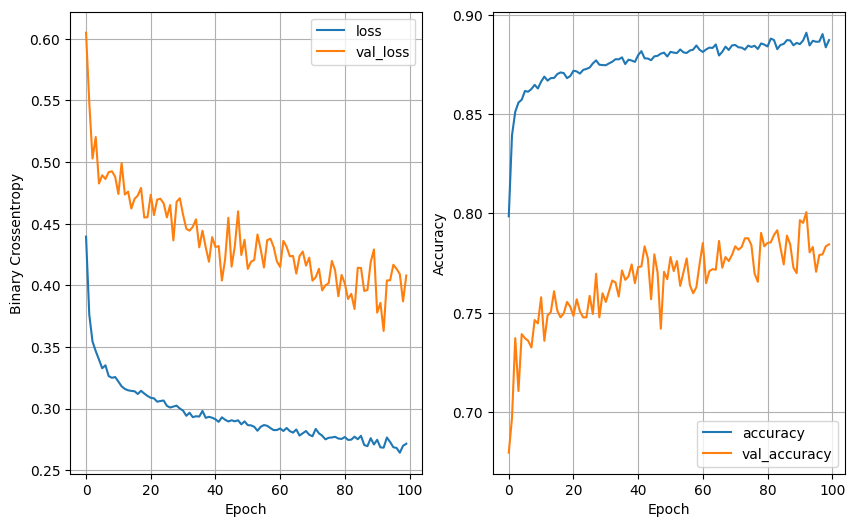

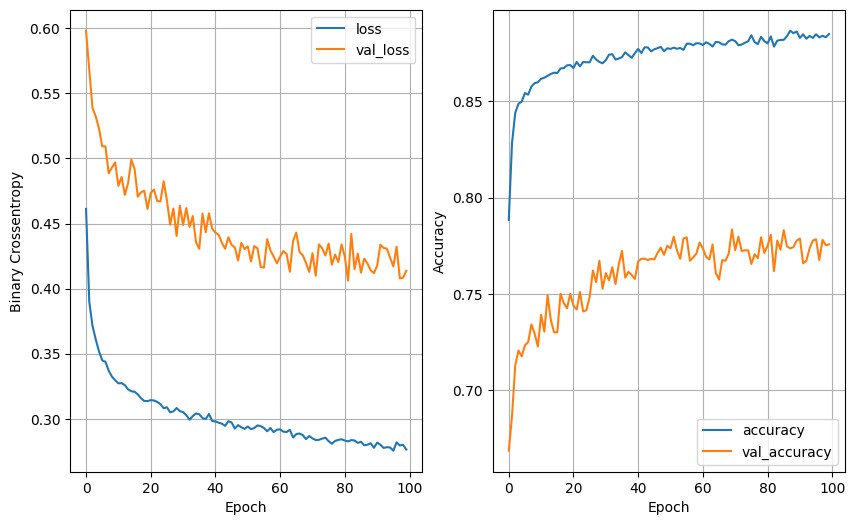

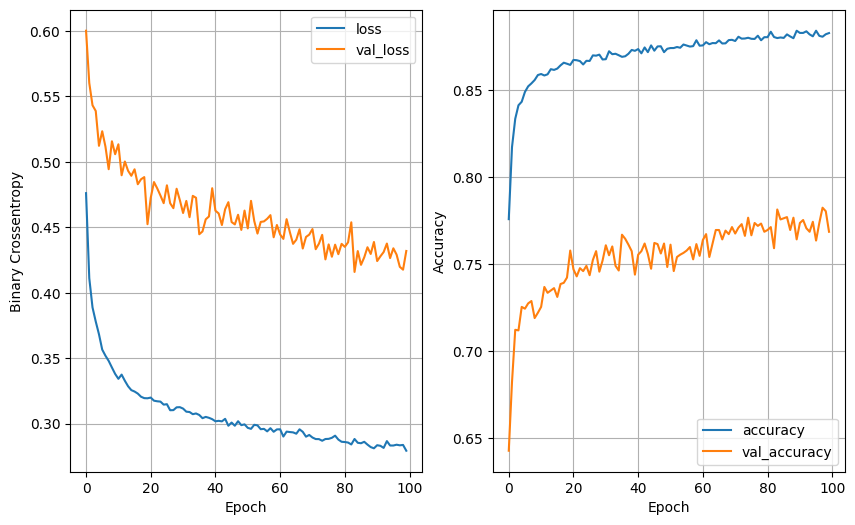

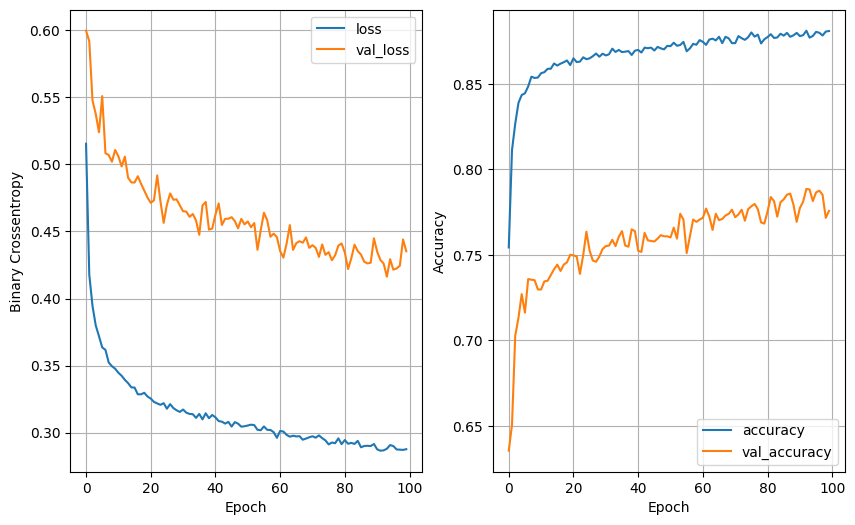

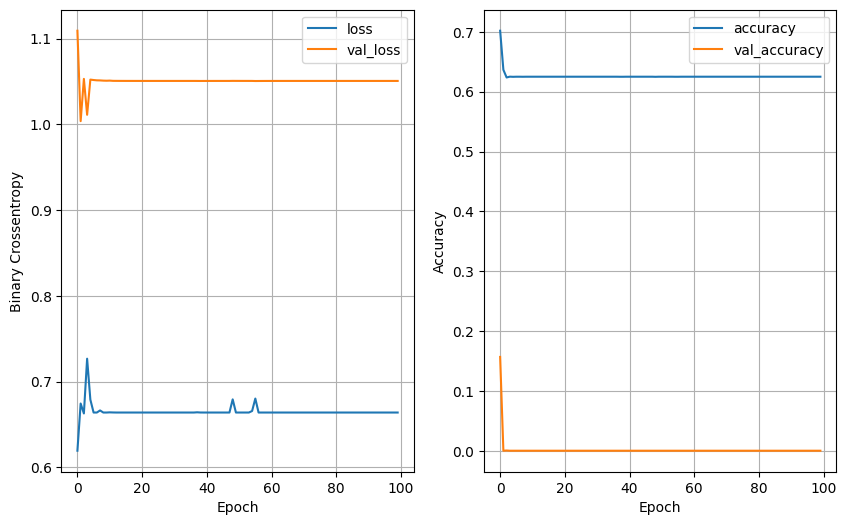

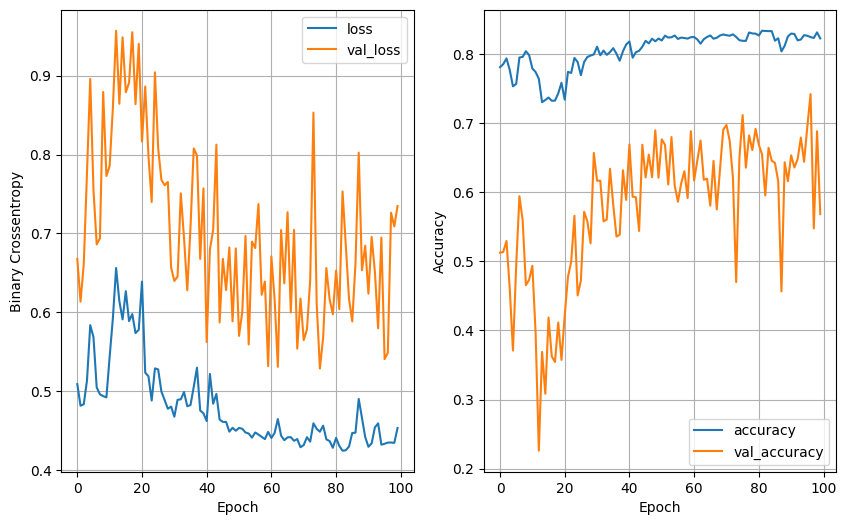

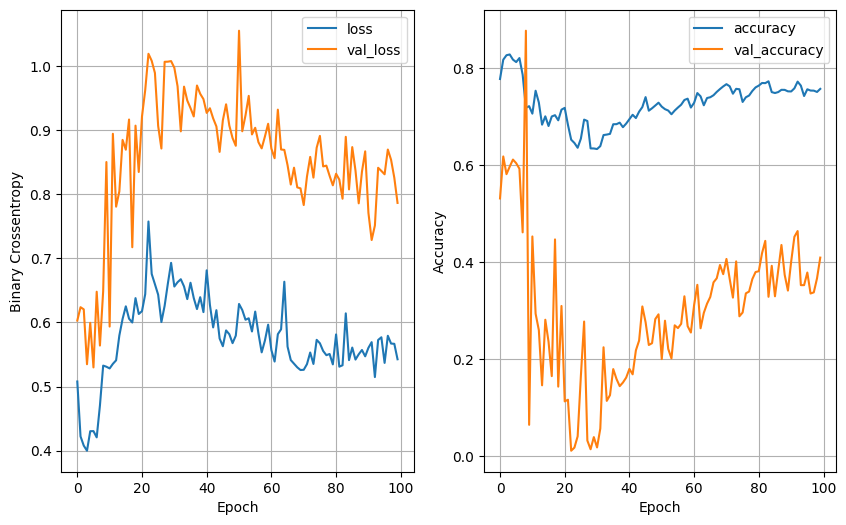

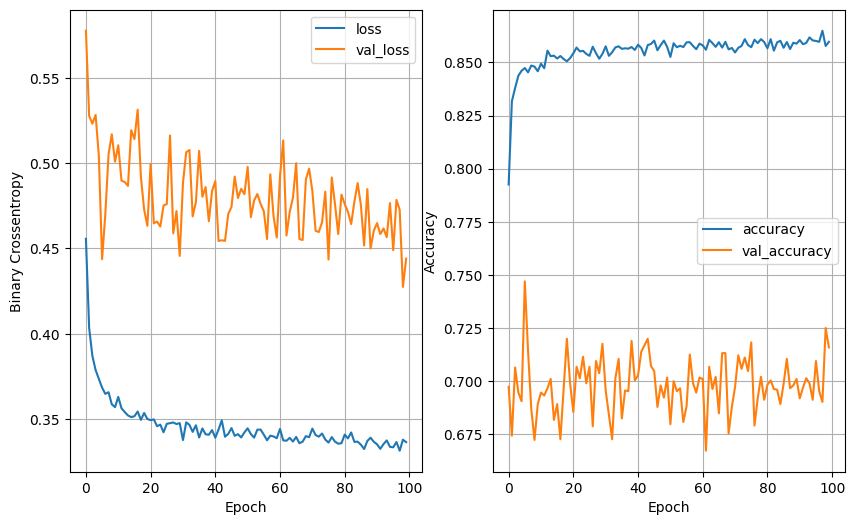

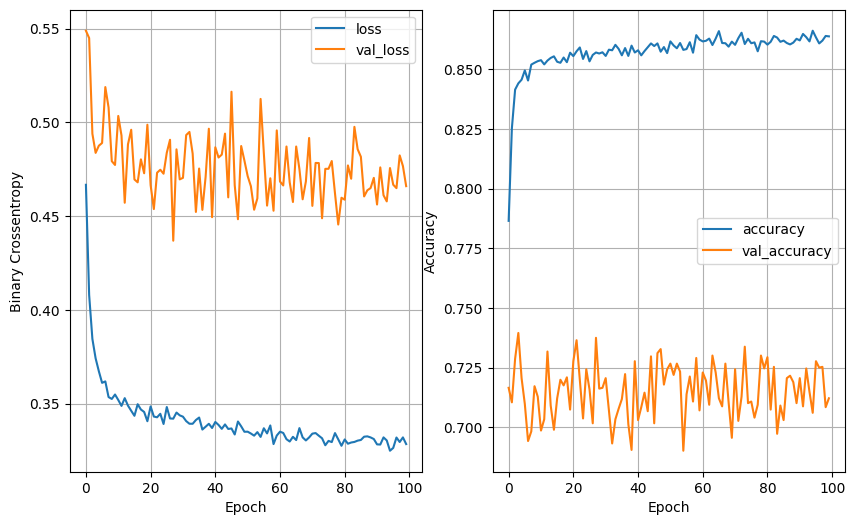

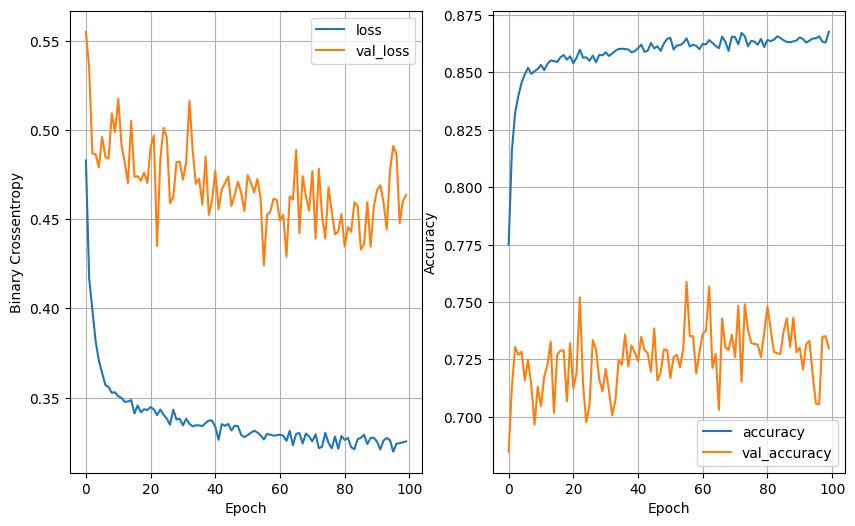

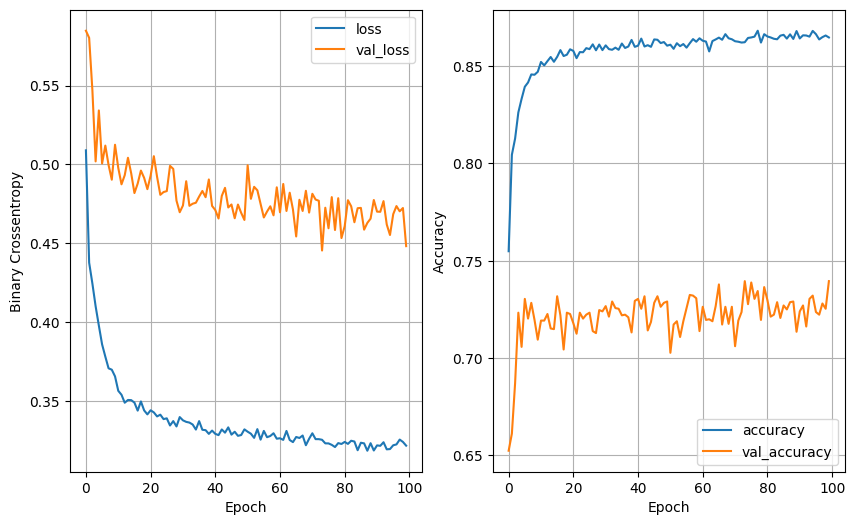

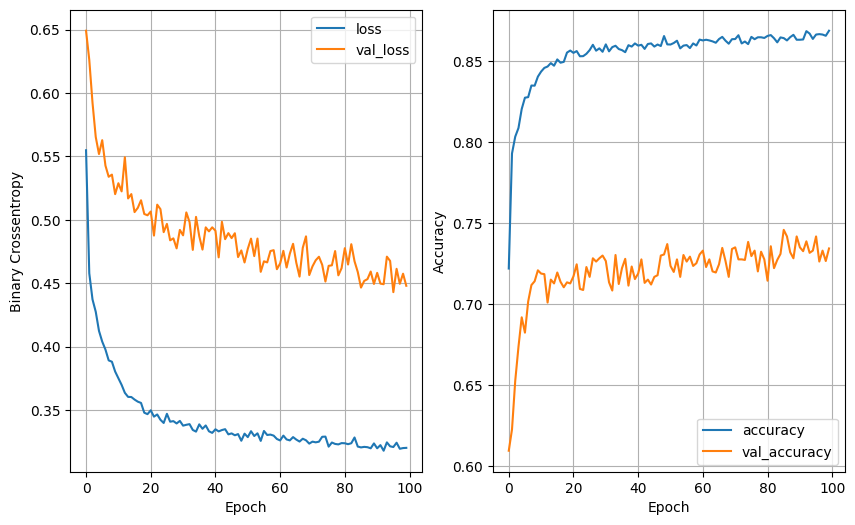

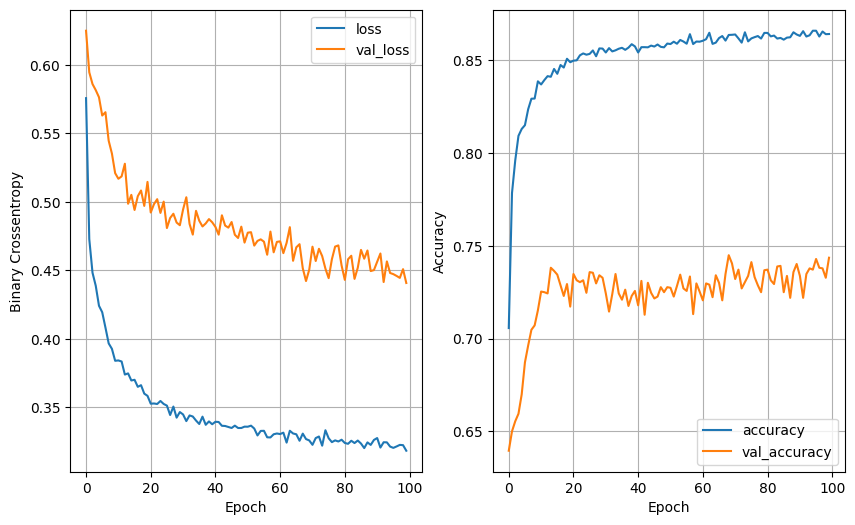

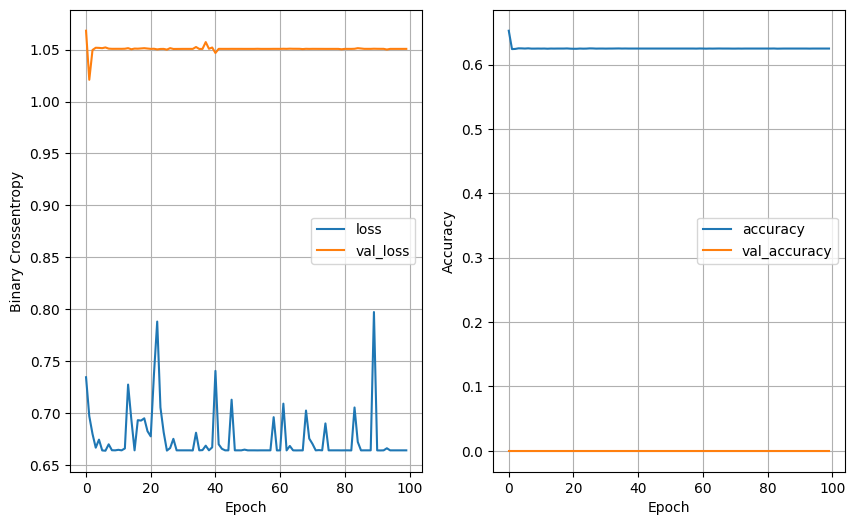

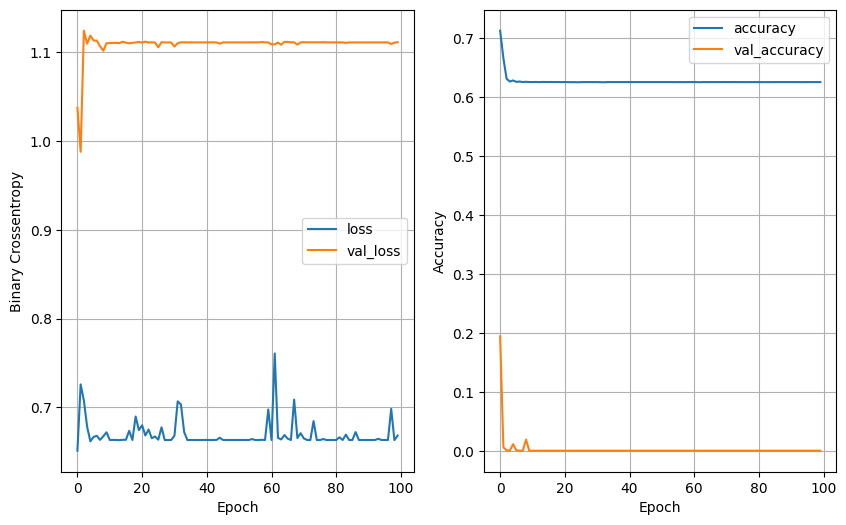

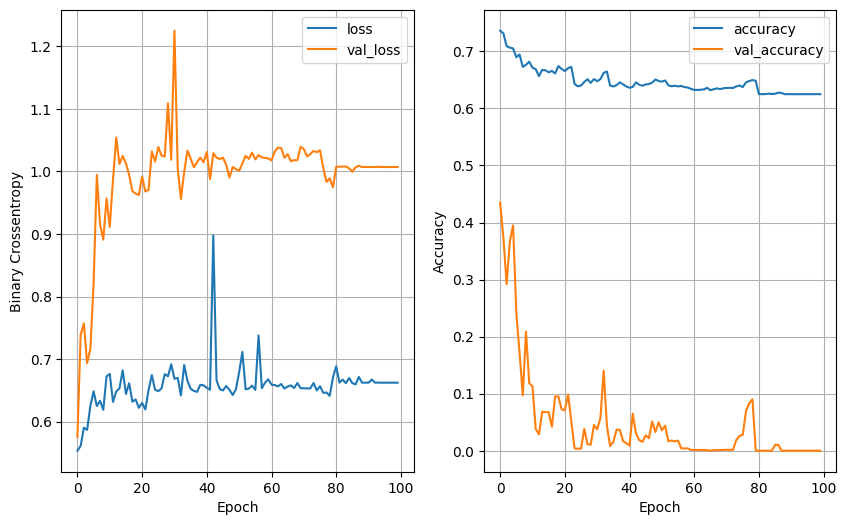

In [ ]:
least_val_model = float('inf')
least_loss_model = None
num_epochs = 100
for num_neurons in [16, 32, 64]:
  for dropout_rate in [0, 0.2, 0.5]:
    for learning_rate in [0.005, 0.001, 0.1]:
      for batch_size in [32, 64, 128]:
        print(f'{num_neurons}nodes, {dropout_rate}dropout,learning_rate{learning_rate}, batch_size{batch_size}')
        model,history = train_model(X_train, y_train, num_epochs, num_neurons,
                learning_rate, batch_size, dropout_rate)
        plot_loss(history)
        valid_loss, valid_accuracy = model.evaluate(X_valid,y_valid)
        if valid_loss < least_val_model:
          least_val_model = valid_loss
          least_loss_model = model




In [ ]:
# def get_classification(dataframe, X_train, y_train, X_test, y_test, task='auto'):
#   if task == 'auto':
#     task = 'classification' if len(np.unique(y_train)) <= 2 else 'regression'
#     print(f'task type: {task}')

#   def evaluate(y_pred, y_test, y_proba=None):
#     if task == 'classification':
#         print(f'accuracy: {accuracy_score(y_test, y_pred)}')
#         print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
#         print(f'classification report: \n{classification_report(y_test, y_pred)}')
#     elif task == 'regression':
#         print(f'r2 score: {r2_score(y_test, y_pred)}')
#         print(f'mean absolute error: {mean_absolute_error(y_test, y_pred)}')
#         print(f'mean squared error: {mean_squared_error(y_test, y_pred)}')
#         print(f'root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
#     else:
#       raise ValueError('task must be classification or regression')



